# T-maze

In [1]:
import numpy as np
from mazelab import BaseMaze
from mazelab import Object
from mazelab import DeepMindColor as color


class Maze(BaseMaze):
    @property
    def size(self):
        return x.shape
    
    def make_objects(self):
        free = Object('free', 0, color.free, False, np.stack(np.where(x == 0), axis=1))
        obstacle = Object('obstacle', 1, color.obstacle, True, np.stack(np.where(x == 1), axis=1))
        agent = Object('agent', 2, color.agent, False, [])
        goal = Object('goal', 3, color.goal, False, [])
        return free, obstacle, agent, goal
    
from mazelab import BaseEnv
from mazelab import VonNeumannMotion

import gym
from gym.spaces import Box
from gym.spaces import Discrete


class Env(BaseEnv):
    def __init__(self):
        super().__init__()
        
        self.maze = Maze()
        self.motions = VonNeumannMotion()
        
        self.observation_space = Box(low=0, high=len(self.maze.objects), shape=self.maze.size, dtype=np.uint8)
        self.action_space = Discrete(len(self.motions))
        
    def step(self, action):
        motion = self.motions[action]
        current_position = self.maze.objects.agent.positions[0]
        new_position = [current_position[0] + motion[0], current_position[1] + motion[1]]
        valid = self._is_valid(new_position)
        if valid:
            self.maze.objects.agent.positions = [new_position]
        
        if self._is_goal(new_position):
            reward = +1
            done = True
        elif not valid:
            reward = -1
            done = False
        else:
            reward = -0.01
            done = False
        return self.maze.to_value(), reward, done, {}
        
    def reset(self):
        self.maze.objects.agent.positions = start_idx
        self.maze.objects.goal.positions = goal_idx
        return self.maze.to_value()
    
    def _is_valid(self, position):
        nonnegative = position[0] >= 0 and position[1] >= 0
        within_edge = position[0] < self.maze.size[0] and position[1] < self.maze.size[1]
        passable = not self.maze.to_impassable()[position[0]][position[1]]
        return nonnegative and within_edge and passable
    
    def _is_goal(self, position):
        out = False
        for pos in self.maze.objects.goal.positions:
            if position[0] == pos[0] and position[1] == pos[1]:
                out = True
                break
        return out
    
    def get_image(self):
        return self.maze.to_rgb()

In [2]:
env_name='RandomMaze-v0'
gym.envs.register(id=env_name, entry_point=Env, max_episode_steps=200)

In [5]:
env = gym.make('RandomMaze-v0')

In [22]:
goal_idx = [[1,11]]
start_idx = [[11,6]]
obs = env.reset()
obs

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [23]:
obs, rew, done, _ = env.step(0)
obs

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [32]:
env.maze.objects.goal.positions[0]

[1, 11]

In [21]:
x = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,1,1,1,1,1,1,1,1,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1,1,1,1,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1]])

0
epoch:  12 	 loss: -1.091 	 return: -2.000 	 ep_len: 107.600


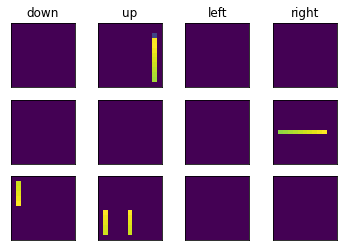

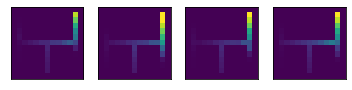

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [47]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
import random as rand



iterations = 1
total_return = []
est0 , est1 , est2 , est3 , est4 , est5 , est6 = [] , [] , [] , [] , [] , [] , []
for iteration in range(iterations):
    size = 13
    env_name='RandomMaze-v0'
    lr=1e-3
#     lr=1e-2
    epochs=10000
    batch_size=1000
    render=False
    epsilon=0.1

    # make environment, check spaces, get obs / act dims
    num_actions = 4
    env = gym.make('RandomMaze-v0')

#     L = env.maze.objects.free.positions
#     goal_idx = [L[np.random.randint(0, len(L))]]

    class policy_net(nn.Module):
        def __init__(self, input_shape, n_actions):
            super(policy_net, self).__init__()


            self.fc = nn.Sequential(

#                 nn.Linear(input_shape,  n_actions)
                
                nn.Linear(input_shape, 64),
                nn.ReLU(),
                nn.Linear(64, 64),
                nn.ReLU(),
                nn.Linear(64, n_actions)
            )

        def forward(self, x):
            return self.fc(x)


    # make function to compute action distribution
    def get_policy(obs):
        logits = logits_net(obs)
#         logits = obs
        return Categorical(logits=logits)

    # make action selection function (outputs int actions, sampled from policy)
    def get_action(obs):
        return get_policy(obs).sample().item()

    # make loss function whose gradient, for the right data, is policy gradient
    def compute_loss(obs, act, weights):
        logp = get_policy(obs).log_prob(act)
        return -(logp * weights).mean()

    def reward_to_go(rews):
        n = len(rews)
        rtgs = np.zeros_like(rews)
        for i in reversed(range(n)):
            rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
        return rtgs

# 
    NUM_GAMMAS = 1

    GAMMAS = [0.98]
    sr = np.zeros((size,size,NUM_GAMMAS))
    Q = np.zeros((size,size,20,num_actions))
    
    sr = np.zeros((size,size,NUM_GAMMAS))
    fut_a_v = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v2 = np.zeros((size,size,NUM_GAMMAS,num_actions))

    Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v2 = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v3 = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v4 = np.zeros((size,size,NUM_GAMMAS,num_actions))
    fut_a_v5 = np.zeros((size,size,NUM_GAMMAS,num_actions))
    # make core of policy network
#     logits_net = policy_net(size*size + size*size+NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+num_actions,num_actions).to('cuda')
#     logits_net = policy_net((size)*(size),num_actions).to('cuda')
#     logits_net = policy_net(8+7*NUM_GAMMAS+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
    logits_net = policy_net(4+num_actions*NUM_GAMMAS+5*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(2+1*num_actions*NUM_GAMMAS,num_actions).to('cpu')

    # make optimizer
    optimizer = optim.Adam(logits_net.parameters(), lr=lr)

    # for training policy
    def train_one_epoch():
        # make some empty lists for logging.
        batch_obs = []          # for observations
        batch_acts = []         # for actions
        batch_weights = []      # for R(tau) weighting in policy gradient
        batch_rets = []         # for measuring episode returns
        batch_lens = []         # for measuring episode lengths

        # reset episode-specific variables
        obs = env.reset()       # first obs comes from starting distribution
        done = False            # signal from environment that episode is over
        ep_rews = []            # list for rewards accrued throughout ep

        # render first episode of each epoch
        finished_rendering_this_epoch = False
        # collect experience by acting in the environment with current policy
        
        while True:
#             est0.append(np.copy(Q_gamma))
#             est1.append(np.copy(sr))
#             est2.append(np.copy(fut_a_v))
#             est3.append(np.copy(fut_a_v2))
#             est4.append(np.copy(fut_a_v3))
#             est5.append(np.copy(fut_a_v4))
#             est6.append(np.copy(fut_a_v5))   
            
            pos = env.maze.objects.agent.positions[0]*1
#             obs[obs==2]=0
#             obs[pos[0],pos[1]]=2
            r_pos = goal_idx[0]*1
            no_r_pos = no_goal[0]*1
#             obs = np.zeros((size,size))
#             obs[pos[0],pos[1]]=1.
#             obs2 = np.zeros((size,size))
#             obs2[r_pos[0],r_pos[1]]=1.
#             obs = np.array([obs,obs2])
#             obs = obs.flatten()

#             obs = np.array([pos[0],pos[1],r_pos[0],r_pos[1]])
#             obs = np.array([pos[0],pos[1]])
    #         obs = np.array([pos[0],pos[1],r_pos[0],r_pos[1],sr_x[pos[0],pos[1]],sr_y[pos[0],pos[1]]])

    #         obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:])]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),
#                    list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:])]
#             obs = [list(obs),list(sr[pos[0],pos[1],:])]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1],in_x[pos[0],pos[1]],
#                     in_y[pos[0],pos[1]],in_x1[pos[0],pos[1]],
#                     in_y1[pos[0],pos[1]]],list(sr[pos[0],pos[1],:]),
#                    list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),
#                    list(fut_x[pos[0],pos[1],:]),list(fut_y[pos[0],pos[1],:]),
#                    list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:]),
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                    list(fut_stx[pos[0],pos[1],:,:].flatten()),
#                    list(fut_sty[pos[0],pos[1],:,:].flatten())]
    
#             obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten()),
# #                    list(fut_st[pos[0],pos[1],:,:].flatten())]
            obs = [[CL,CR],
                   list(fut_a_v[pos[0],pos[1],:,:].flatten())]
            obs = np.array([item for sublist in obs for item in sublist])
            obs = obs.flatten()


            # save obs
            batch_obs.append(obs)
            
            # act in the environment
#             act = get_action(torch.as_tensor(np.abs(Q_gamma[pos[0],pos[1],-1,:]), dtype=torch.float32).to('cpu'))
            
#             act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cpu'))
            if np.random.uniform(0,1)>0.8:
                act = np.random.choice([0,1,2,3])
            else:
                act = np.argmax(Q_gamma[pos[0],pos[1],-1,:])
            act = np.random.choice([0,1,2,3])
#             act = get_action(torch.as_tensor(np.abs(Q[pos[0],pos[1],CL-CR,:]), dtype=torch.float32).to('cpu'))
#             act = np.random.choice([0,1,2,3])
            _, rew, done, _ = env.step(act)
       
            pos_next = env.maze.objects.agent.positions[0]*1
        
#             pos_next_r = pos*1

#             pos_next_r[0] = np.max([0,np.min([size-1,pos[0]+np.random.choice([1,0,-1])])])
#             pos_next_r[1] = np.max([0,np.min([size-1,pos[1]+np.random.choice([1,0,-1])])])

#             if np.sum(np.sum(L==np.array(pos_next_r),1)==2)==1:
#                 pos_next_r = pos_next_r
#             else:
#                 pos_next_r = pos*1

#             utility_x, utility_y , utility_x1, utility_y1 = 0 , 0 , 0 , 0
#             if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==0:
#                 utility_x = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==0:
#                 utility_y = 0.1
#             if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==0:
#                 utility_x1 = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==0:
#                 utility_y1 = 0.1   
                
#             if pos[0]==1:
#                 utility_x = 0.1
#             if pos[1]==1:
#                 utility_y = 0.1
#             if pos[0]==size-2:
#                 utility_x1 = 0.1
#             if pos[1]==size-2:
#                 utility_y1 = 0.1     
                
            utility = pos_next[0]==r_pos[0] and pos_next[1]==r_pos[1]
#             utility_x = (pos_next_r[0]-size/2)/20
#             utility_y = (pos_next_r[1]-size/2)/20
            
#             in_x[pos[0],pos[1]] = in_x[pos[0],pos[1]] + 1 * (utility_x
#                                                                  - in_x[pos[0],pos[1]])
#             in_y[pos[0],pos[1]] = in_y[pos[0],pos[1]] + 1 * (utility_y
#                                                                  - in_y[pos[0],pos[1]])
#             in_x1[pos[0],pos[1]] = in_x1[pos[0],pos[1]] + 1 * (utility_x1
#                                                                  - in_x1[pos[0],pos[1]])
#             in_y1[pos[0],pos[1]] = in_y1[pos[0],pos[1]] + 1 * (utility_y1
#                                                                  - in_y1[pos[0],pos[1]])  
                                    
#             probs = np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cuda')).probs.detach().to('cpu'))
#             probs = probs+0.1
            probs = [0.25, 0.25, 0.25, 0.25]
            if True:
                for g in range(NUM_GAMMAS):
                    sr[pos[0],pos[1],g] = sr[pos[0],pos[1],g] + 0.3 * (utility
                                                                        + (1-utility) * GAMMAS[g] * sr[pos_next[0],pos_next[1],g] 
                                                                       - sr[pos[0],pos[1],g])


                    theta_sr = 0.98; theta_sr1 = 0.8; 
                    #LEVEL 1
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (sr[pos[0]+1,pos[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,0] = fut_a_v[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (sr[pos[0]-1,pos[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,1] = fut_a_v[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (sr[pos[0],pos[1]-1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,2] = fut_a_v[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v[pos[0],pos[1],g,2])


                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (sr[pos[0],pos[1]+1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,3] = fut_a_v[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v[pos[0],pos[1],g,3])



                    #LEVEL 2
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,0] = fut_a_v2[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v2[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,1] = fut_a_v2[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v2[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,2] = fut_a_v2[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]-1,g,2] 
                                                                                - fut_a_v2[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,3] = fut_a_v2[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v2[pos[0],pos[1],g,3])



                    #LEVEL 3
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,0] = fut_a_v3[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v3[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,1] = fut_a_v3[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v3[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,2] = fut_a_v3[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v3[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr  and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,3] = fut_a_v3[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v3[pos[0],pos[1],g,3])


                        
                    #LEVEL 4 
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,0] = fut_a_v4[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v4[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,1] = fut_a_v4[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]-1,pos[1],g,1] 
                                                                                - fut_a_v4[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,2] = fut_a_v4[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v4[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,3] = fut_a_v4[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v4[pos[0],pos[1],g,3])
 




                    #LEVEL 5
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,0] = fut_a_v5[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v5[pos[0],pos[1],g,0])


                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,1] = fut_a_v5[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v5[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,2] = fut_a_v5[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v5[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,3] = fut_a_v5[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v5[pos[0],pos[1],g,3])

                        

                        
                    #Q-values
#                     if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,0] = Q_gamma[pos[0],pos[1],g,0] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
#                                                         Q_gamma[pos[0]+1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,0])
                            
#                     if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,1] = Q_gamma[pos[0],pos[1],g,1] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
#                                                         Q_gamma[pos[0]-1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,1])

#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,2] = Q_gamma[pos[0],pos[1],g,2] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
#                                                         Q_gamma[pos[0],pos[1]-1,g,:]) - Q_gamma[pos[0],pos[1],g,2])

#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,3] = Q_gamma[pos[0],pos[1],g,3] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
#                                                         Q_gamma[pos[0],pos[1]+1,g,:]) - Q_gamma[pos[0],pos[1],g,3])
        
                    Q_gamma[pos[0],pos[1],g,act] = Q_gamma[pos[0],pos[1],g,act] + 0.2 * (utility + (1 - utility) * 0.9 * np.max(
                                                    Q_gamma[pos_next[0],pos_next[1],g,:]) - Q_gamma[pos[0],pos[1],g,act])        


    #             if np.max(Q_gamma)>0:
    #                 Q_gamma[:,:,:,:] = 5*(Q_gamma[:,:,:,:]-np.min(Q_gamma[:,:,:,:]))/(
    #                     np.max(Q_gamma[:,:,:,:])-np.min(Q_gamma[:,:,:,:]))

    #                 sr[:,:,:] = (sr[:,:,:]-np.min(sr[:,:,:]))/(
    #                     np.max(sr[:,:,:])-np.min(sr[:,:,:]))

            
            rew=0
                
            if pos_next[0]==r_pos[0] and pos_next[1]==r_pos[1]:
                rew=10
                done = True
            elif pos_next[0]==no_r_pos[0] and pos_next[1]==no_r_pos[1]:
                rew=-5
                done = True
                
            # save action, reward
            batch_acts.append(act)
            ep_rews.append(rew)


            if done:
            
                # if episode is over, record info about episode
                ep_ret, ep_len = sum(ep_rews), len(ep_rews)
                batch_rets.append(ep_ret)
                batch_lens.append(ep_len)
                
                # the weight for each logprob(a|s) is R(tau)
                batch_weights += list(reward_to_go(ep_rews))

                # reset episode-specific variables
    #             start_idx = [L[np.random.randint(0, len(L))]]
                obs, done, ep_rews = env.reset(), False, []


                # end experience loop if we have enough of it
                if len(batch_obs) > batch_size:
                    break

        # take a single policy gradient update step
        batch_loss = 0

        optimizer.zero_grad()
        batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cpu'),
                                  act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cpu'),
                                  weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cpu')
                                  )
        batch_loss.backward()
        optimizer.step()
        return batch_loss, batch_rets, batch_lens

    total_reward = []
    # training loop

    for i in range(epochs):

        clear_output(wait=True)
        

        change = 3
        env = gym.make(env_name)
        L = env.maze.objects.free.positions
        CL = rand.randint(0,10)
        CR = 10 - CL
        if CL>CR:
            goal_idx = [[1,1]]
            no_goal = [[1,11]]
        else:
            goal_idx = [[1,11]]
            no_goal = [[1,1]]
        goal_idx = [[1,11]]
        start_idx = [[11,6]]

        if i==0 or i%change==0:
            start_idx = [L[np.random.randint(0, len(L))]]
            
        obs = env.reset()
        batch_loss, batch_rets, batch_lens = train_one_epoch()
#         print(start_idx)
        print(iteration)
        print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
                (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))
        if i>0 and (i)%change!=0:
            total_reward.append(np.mean(batch_rets))

        x_grid,y_grid = np.meshgrid(np.linspace(20,480,size),np.linspace(20,480,size))

#         print(start_idx)
#         print(env.maze.objects.agent.positions[0])
        img = env.render('rgb_array')
        

        policy = np.zeros((size,size,4))
        for x_pos in range(size):
            for y_pos in range(size):
                pos = [x_pos,y_pos]
                r_pos = goal_idx[0]*1
#                 obs = env.reset()
#                 obs[obs==2]=0
#                 obs[x_pos,y_pos]=2
                
#                 obs[x_pos,y_pos]=2
                
#                 obs = np.array([x_pos,y_pos,r_pos[0],r_pos[1]])
#                 obs = np.array([x_pos,y_pos])
    #             obs = np.array([x_pos,y_pos,r_pos[0],r_pos[1],sr_x[x_pos,y_pos],sr_y[x_pos,y_pos]])
    #             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:])]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),
#                        list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:])]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),list(Q_gamma[pos[0],pos[1],:,:].flatten())]
   
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1],sr_x[pos[0],pos[1]],sr_y[pos[0],pos[1]],sr_x1[pos[0],pos[1]],sr_y1[pos[0],pos[1]]]
#                        ,list(sr[pos[0],pos[1],:]),list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1],in_x[pos[0],pos[1]],
#                         in_y[pos[0],pos[1]],in_x1[pos[0],pos[1]],
#                         in_y1[pos[0],pos[1]]],list(sr[pos[0],pos[1],:]),
#                        list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),
#                        list(fut_x[pos[0],pos[1],:]),list(fut_y[pos[0],pos[1],:]),
#                        list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:]),
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                        list(fut_stx[pos[0],pos[1],:,:].flatten()),
#                        list(fut_sty[pos[0],pos[1],:,:].flatten())]

#                 obs = [[pos[0]/50,pos[1]/50,r_pos[0]/50,r_pos[1]/50],
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                        list(fut_st[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = np.array([item for sublist in obs for item in sublist])
#                 pos = [x_pos,y_pos]
#                 obs = np.zeros((size,size))
#                 obs[pos[0],pos[1]]=1.
#                 obs2 = np.zeros((size,size))
#                 obs2[r_pos[0],r_pos[1]]=1.
#                 obs = np.array([obs,obs2])
#                 obs = obs.flatten()
# #                 obs = [list(obs),list(sr[pos[0],pos[1],:])]
                obs = [[CL,CR],
                       list(fut_a_v[pos[0],pos[1],:,:].flatten())]
                obs = np.array([item for sublist in obs for item in sublist])
                obs = obs.flatten()
                policy[x_pos,y_pos,:]=np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cpu')).probs.detach().to('cpu'))
#                 policy[x_pos,y_pos,:]=np.array(get_policy(torch.as_tensor(Q[pos[0],pos[1],CL-CR,:], dtype=torch.float32).to('cpu')).probs.detach().to('cpu'))

        
        u = policy[:,:,3]-policy[:,:,2]
        v = policy[:,:,0]-policy[:,:,1]

        plt.subplot(3,4,1)
        plt.imshow(fut_a_v[:,:,-1,0]); plt.title('down');  plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,2)
        plt.imshow(fut_a_v[:,:,-1,1]); plt.title('up'); plt.xticks([]);  plt.yticks([]) 
        plt.subplot(3,4,3)
        plt.imshow(fut_a_v[:,:,-1,2]); plt.title('left'); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,4)
        plt.imshow(fut_a_v[:,:,-1,3]); plt.title('right'); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,5)
        plt.imshow(fut_a_v2[:,:,-1,0]); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,6)
        plt.imshow(fut_a_v2[:,:,-1,1]); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,7)
        plt.imshow(fut_a_v2[:,:,-1,2]);  plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,8)
        plt.imshow(fut_a_v2[:,:,-1,3]);  plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,9)
        plt.imshow(fut_a_v3[:,:,-1,0]); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,10)
        plt.imshow(fut_a_v3[:,:,-1,1]); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,11)
        plt.imshow(fut_a_v3[:,:,-1,2]); plt.xticks([]);  plt.yticks([])
        plt.subplot(3,4,12)
        plt.imshow(fut_a_v3[:,:,-1,3]); plt.xticks([]);  plt.yticks([])


        plt.figure()
        plt.subplot(1,4,1)
        plt.imshow(Q_gamma[:,:,-1,1]); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,2)
        plt.imshow(Q_gamma[:,:,-1,0]); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,3)
        plt.imshow(Q_gamma[:,:,-1,2]); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,4)
        plt.imshow(Q_gamma[:,:,-1,3]); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.show()
        
        plt.figure()
        plt.subplot(1,4,1)
        plt.imshow(Q_gamma[:,:,-1,1]*((np.argmax(Q_gamma[:,:,-1,:],axis=-1)==1)*1)); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,2)
        plt.imshow(Q_gamma[:,:,-1,0]*((np.argmax(Q_gamma[:,:,-1,:],axis=-1)==0)*1)); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,3)
        plt.imshow(Q_gamma[:,:,-1,2]*((np.argmax(Q_gamma[:,:,-1,:],axis=-1)==2)*1)); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.subplot(1,4,4)
        plt.imshow(Q_gamma[:,:,-1,3]*((np.argmax(Q_gamma[:,:,-1,:],axis=-1)==3)*1)); plt.xticks([]);  plt.yticks([]); plt.clim([0,1])
        plt.show()        


        plt.imshow(img); 
#         plt.quiver(x_grid,y_grid,u,v); plt.show()
        plt.plot(total_reward);  plt.show()
#         plt.imshow(Q_gamma[:,:,-1,1]); plt.colorbar(); plt.show()
    total_return.append(total_reward)


In [41]:
(np.argmax(Q_gamma[:,:,-1,:],axis=-1)==1)*1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [34]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
from mazelab.generators import random_maze


iterations = 1
total_return = []
est0 , est1 , est2 , est3 , est4 , est5 , est6 = [] , [] , [] , [] , [] , [] , []
for iteration in range(iterations):
    size = 20
    env_name='RandomMaze-v0'
    lr=5e-4
#     lr=1e-2
    epochs=10000
    batch_size=1000
    render=False
    epsilon=0.1

    # make environment, check spaces, get obs / act dims
    x = random_maze(width=size, height=size, complexity=1, density=0.5)
    num_actions = 4
    env = gym.make('RandomMaze-v0')

#     L = env.maze.objects.free.positions
#     goal_idx = [L[np.random.randint(0, len(L))]]

    class policy_net(nn.Module):
        def __init__(self, input_shape, n_actions):
            super(policy_net, self).__init__()


            self.fc = nn.Sequential(

#                 nn.Linear(input_shape,  n_actions)
                
                nn.Linear(input_shape, 50),
                nn.ReLU(),
                nn.Linear(50, n_actions)
            )

        def forward(self, x):
            return self.fc(x)


    # make function to compute action distribution
    def get_policy(obs):
        logits = logits_net(obs)
#         logits = obs
        return Categorical(logits=logits)

    # make action selection function (outputs int actions, sampled from policy)
    def get_action(obs):
        return get_policy(obs).sample().item()

    # make loss function whose gradient, for the right data, is policy gradient
    def compute_loss(obs, act, weights):
        logp = get_policy(obs).log_prob(act)
        return -(logp * weights).mean()

    def reward_to_go(rews):
        n = len(rews)
        rtgs = np.zeros_like(rews)
        for i in reversed(range(n)):
            rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
        return rtgs

# 
    NUM_GAMMAS = 1

    taus=np.linspace(1,30,NUM_GAMMAS); #The taus are linearly separated (see next line)

#     GAMMAS=np.exp(-1/taus)

#     GAMMAS = np.linspace(0.8,0.99,NUM_GAMMAS)
#     GAMMAS = [0.6,0.9,0.995]
    GAMMAS = [0.99]
    sr = np.zeros((size,size,NUM_GAMMAS))
    Q = np.zeros((size,size,num_actions))
    Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
    sr_x = np.zeros((size,size))
    sr_y = np.zeros((size,size))
    sr_x1 = np.zeros((size,size))
    sr_y1 = np.zeros((size,size))
    # make core of policy network
#     logits_net = policy_net(size*size + size*size+NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+num_actions,num_actions).to('cuda')
#     logits_net = policy_net((size)*(size),num_actions).to('cuda')
#     logits_net = policy_net(8+7*NUM_GAMMAS+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+num_actions*NUM_GAMMAS,num_actions).to('cuda')
    logits_net = policy_net(4+6*num_actions*NUM_GAMMAS,num_actions).to('cpu')

    # make optimizer
    optimizer = optim.Adam(logits_net.parameters(), lr=lr)

    # for training policy
    def train_one_epoch():
        # make some empty lists for logging.
        batch_obs = []          # for observations
        batch_acts = []         # for actions
        batch_weights = []      # for R(tau) weighting in policy gradient
        batch_rets = []         # for measuring episode returns
        batch_lens = []         # for measuring episode lengths

        # reset episode-specific variables
        obs = env.reset()       # first obs comes from starting distribution
        done = False            # signal from environment that episode is over
        ep_rews = []            # list for rewards accrued throughout ep

        # render first episode of each epoch
        finished_rendering_this_epoch = False
        # collect experience by acting in the environment with current policy
        
        while True:
#             est0.append(np.copy(Q_gamma))
#             est1.append(np.copy(sr))
#             est2.append(np.copy(fut_a_v))
#             est3.append(np.copy(fut_a_v2))
#             est4.append(np.copy(fut_a_v3))
#             est5.append(np.copy(fut_a_v4))
#             est6.append(np.copy(fut_a_v5))   
            
            pos= env.maze.objects.agent.positions[0]*1
#             obs[obs==2]=0
#             obs[pos[0],pos[1]]=2
            r_pos = env.maze.objects.goal.positions[0]*1
#             obs = np.zeros((size,size))
#             obs[pos[0],pos[1]]=1.
#             obs2 = np.zeros((size,size))
#             obs2[r_pos[0],r_pos[1]]=1.
#             obs = np.array([obs,obs2])
#             obs = obs.flatten()

#             obs = np.array([pos[0],pos[1],r_pos[0],r_pos[1]])
#             obs = np.array([pos[0],pos[1]])
    #         obs = np.array([pos[0],pos[1],r_pos[0],r_pos[1],sr_x[pos[0],pos[1]],sr_y[pos[0],pos[1]]])

    #         obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:])]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),
#                    list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:])]
#             obs = [list(obs),list(sr[pos[0],pos[1],:])]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#             obs = [[pos[0],pos[1],r_pos[0],r_pos[1],in_x[pos[0],pos[1]],
#                     in_y[pos[0],pos[1]],in_x1[pos[0],pos[1]],
#                     in_y1[pos[0],pos[1]]],list(sr[pos[0],pos[1],:]),
#                    list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),
#                    list(fut_x[pos[0],pos[1],:]),list(fut_y[pos[0],pos[1],:]),
#                    list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:]),
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                    list(fut_stx[pos[0],pos[1],:,:].flatten()),
#                    list(fut_sty[pos[0],pos[1],:,:].flatten())]
    
#             obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten()),
# #                    list(fut_st[pos[0],pos[1],:,:].flatten())]
            obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
                   list(fut_a_v[pos[0],pos[1],:,:].flatten()),
                   list(fut_a_v2[pos[0],pos[1],:,:].flatten()),
                   list(fut_a_v3[pos[0],pos[1],:,:].flatten()),
                   list(fut_a_v4[pos[0],pos[1],:,:].flatten()),
                   list(fut_a_v5[pos[0],pos[1],:,:].flatten()),
                   list(Q_gamma[pos[0],pos[1],:,:].flatten())]
            obs = np.array([item for sublist in obs for item in sublist])
            obs = obs.flatten()


            # save obs
            batch_obs.append(obs)
            
            # act in the environment
#             act = get_action(torch.as_tensor(np.abs(Q_gamma[pos[0],pos[1],-1,:]), dtype=torch.float32).to('cpu'))
            
#             act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cuda'))
            if any([i<5,(i)%change==0,(i-1)%change==0,(i-2)%change==0,(i-3)%change==0,(i-4)%change==0,(i-5)%change==0,(i-6)%change==0,
                    (i-7)%change==0,(i-8)%change==0,(i-9)%change==0,(i-10)%change==0 ,(i-11)%change==0]):
                act = np.random.choice([0,1,2,3])
            else:
#                 act = get_action(torch.as_tensor(np.abs(Q_gamma[pos[0],pos[1],-1,:]), dtype=torch.float32).to('cpu'))
                act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cpu'))
    
    
#             act = np.random.choice([0,1,2,3])

            _, rew, done, _ = env.step(act)
       
            pos_next = env.maze.objects.agent.positions[0]*1
        
#             pos_next_r = pos*1

#             pos_next_r[0] = np.max([0,np.min([size-1,pos[0]+np.random.choice([1,0,-1])])])
#             pos_next_r[1] = np.max([0,np.min([size-1,pos[1]+np.random.choice([1,0,-1])])])

#             if np.sum(np.sum(L==np.array(pos_next_r),1)==2)==1:
#                 pos_next_r = pos_next_r
#             else:
#                 pos_next_r = pos*1

#             utility_x, utility_y , utility_x1, utility_y1 = 0 , 0 , 0 , 0
#             if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==0:
#                 utility_x = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==0:
#                 utility_y = 0.1
#             if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==0:
#                 utility_x1 = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==0:
#                 utility_y1 = 0.1   
                
#             if pos[0]==1:
#                 utility_x = 0.1
#             if pos[1]==1:
#                 utility_y = 0.1
#             if pos[0]==size-2:
#                 utility_x1 = 0.1
#             if pos[1]==size-2:
#                 utility_y1 = 0.1     
                
            utility = pos_next[0]==r_pos[0] and pos_next[1]==r_pos[1]
#             utility_x = (pos_next_r[0]-size/2)/20
#             utility_y = (pos_next_r[1]-size/2)/20
            
#             in_x[pos[0],pos[1]] = in_x[pos[0],pos[1]] + 1 * (utility_x
#                                                                  - in_x[pos[0],pos[1]])
#             in_y[pos[0],pos[1]] = in_y[pos[0],pos[1]] + 1 * (utility_y
#                                                                  - in_y[pos[0],pos[1]])
#             in_x1[pos[0],pos[1]] = in_x1[pos[0],pos[1]] + 1 * (utility_x1
#                                                                  - in_x1[pos[0],pos[1]])
#             in_y1[pos[0],pos[1]] = in_y1[pos[0],pos[1]] + 1 * (utility_y1
#                                                                  - in_y1[pos[0],pos[1]])  
                                    
#             probs = np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cuda')).probs.detach().to('cpu'))
#             probs = probs+0.1
            probs = [0.25, 0.25, 0.25, 0.25]
            if True:
                for g in range(NUM_GAMMAS):
                    sr[pos[0],pos[1],g] = sr[pos[0],pos[1],g] + 0.3 * (utility
                                                                        + (1-utility) * GAMMAS[g] * sr[pos_next[0],pos_next[1],g] 
                                                                       - sr[pos[0],pos[1],g])

    #                 sr_x[pos[0],pos[1],g] = sr_x[pos[0],pos[1],g] + 0.1 * (utility_x
    #                                                                     + np.abs(0.1-utility_x)*GAMMAS[g] * sr_x[pos_next[0],pos_next[1],g] 
    #                                                                        - sr_x[pos[0],pos[1],g])

    #                 sr_y[pos[0],pos[1],g] = sr_y[pos[0],pos[1],g] + 0.1 * (utility_y
    #                                                                     + np.abs(0.1-utility_y)*GAMMAS[g] * sr_y[pos_next[0],pos_next[1],g]
    #                                                                        - sr_y[pos[0],pos[1],g])

    #                 sr_x1[pos[0],pos[1],g] = sr_x1[pos[0],pos[1],g] + 0.1 * (utility_x1
    #                                                                     + np.abs(0.1-utility_x1)*GAMMAS[g] * sr_x1[pos_next[0],pos_next[1],g] 
    #                                                                          - sr_x1[pos[0],pos[1],g])

    #                 sr_y1[pos[0],pos[1],g] = sr_y1[pos[0],pos[1],g] + 0.1 * (utility_y1
    #                                                                     + np.abs(0.1-utility_y1)*GAMMAS[g] * sr_y1[pos_next[0],pos_next[1],g] 
    #                                                                          - sr_y1[pos[0],pos[1],g])

    #                 fut_x[pos[0],pos[1],g] = fut_x[pos[0],pos[1],g] + 0.1 * ((pos[0]-size/2)/20
    #                                                                     + GAMMAS[g] * fut_x[pos_next[0],pos_next[1],g] 
    #                                                                        - fut_x[pos[0],pos[1],g])

    #                 fut_y[pos[0],pos[1],g] = fut_y[pos[0],pos[1],g] + 0.1 * ((pos[1]-size/2)/20
    #                                                                     + GAMMAS[g] * fut_y[pos_next[0],pos_next[1],g]
    #                                                                        - fut_y[pos[0],pos[1],g])

    #                 fut_stx[pos[0],pos[1],g,act] = fut_stx[pos[0],pos[1],g,act] +  0.1 * ((pos[0])/20
    #                                                                     + GAMMAS[g] * fut_stx[pos_next_r[0],pos_next_r[1],g,act] 
    #                                                                        - fut_stx[pos[0],pos[1],g,act])


    #                 fut_sty[pos[0],pos[1],g,act] = fut_sty[pos[0],pos[1],g,act] +  0.1 * ((pos[1])/20
    #                                                                     + GAMMAS[g] * fut_sty[pos_next_r[0],pos_next_r[1],g,act] 
    #                                                                        - fut_sty[pos[0],pos[1],g,act])                


#                     if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,0] = fut_st[pos[0],pos[1],g,0] + (1/probs[1]) * 0.2 * ((pos[0]+1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0]+1,pos[1],g,0] 
#                                                                                - fut_st[pos[0],pos[1],g,0])


#                     if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,1] = fut_st[pos[0],pos[1],g,1] + (1/probs[0]) * 0.2 * ((pos[0]-1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0]-1,pos[1],g,1] 
#                                                                                - fut_st[pos[0],pos[1],g,1])


#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,2] = fut_st[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * ((pos[1]-1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0],pos[1]-1,g,2] 
#                                                                                - fut_st[pos[0],pos[1],g,2])

#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,3] = fut_st[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * ((pos[1]+1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0],pos[1]+1,g,3] 
#                                                                                - fut_st[pos[0],pos[1],g,3])





                    theta_sr = 0.1; theta_sr1 = 0.1; 
    
#                     ut = (sr[pos_next[0],pos_next[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
#                     fut_a_v[pos[0],pos[1],g,act] = fut_a_v[pos[0],pos[1],g,act] +  0.2 * (ut
#                                                                         + (1 - ut) * GAMMAS[g] * fut_a_v[pos_next[0],pos_next[1],g,act] 
#                                                                            - fut_a_v[pos[0],pos[1],g,act])
                    #LEVEL 1 (really 0)
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (sr[pos[0]+1,pos[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,0] = fut_a_v[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (sr[pos[0]-1,pos[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,1] = fut_a_v[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (sr[pos[0],pos[1]-1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,2] = fut_a_v[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v[pos[0],pos[1],g,2])


                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (sr[pos[0],pos[1]+1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        fut_a_v[pos[0],pos[1],g,3] = fut_a_v[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v[pos[0],pos[1],g,3])



                    #LEVEL 2
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,0] = fut_a_v2[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v2[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,1] = fut_a_v2[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v2[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,2] = fut_a_v2[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]-1,g,2] 
                                                                                - fut_a_v2[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,3] = fut_a_v2[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v2[pos[0],pos[1],g,3])



                    #LEVEL 3
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,0] = fut_a_v3[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v3[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,1] = fut_a_v3[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v3[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,2] = fut_a_v3[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v3[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v2[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr  and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,3] = fut_a_v3[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v3[pos[0],pos[1],g,3])


                        
                    #LEVEL 4 
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,0] = fut_a_v4[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v4[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,1] = fut_a_v4[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]-1,pos[1],g,1] 
                                                                                - fut_a_v4[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,2] = fut_a_v4[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v4[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v3[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,3] = fut_a_v4[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v4[pos[0],pos[1],g,3])
 




                    #LEVEL 5
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,0] = fut_a_v5[pos[0],pos[1],g,0] + (1/probs[0]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v5[pos[0],pos[1],g,0])


                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,1] = fut_a_v5[pos[0],pos[1],g,1] + (1/probs[1]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v5[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,2] = fut_a_v5[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v5[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        ut = (any(fut_a_v4[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,3] = fut_a_v5[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v5[pos[0],pos[1],g,3])
                        
                    Q_gamma[pos[0],pos[1],g,act] = Q_gamma[pos[0],pos[1],g,act] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
                                                                                Q_gamma[pos_next[0],pos_next[1],g,:]) - Q_gamma[pos[0],pos[1],g,act])
        
#                     if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,0] = Q_gamma[pos[0],pos[1],g,0] + 0.1 * (utility + GAMMAS[g] * np.max(
#                                                                                     Q_gamma[pos[0]-1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,0] )
                                                                                         
#                     if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,1] = Q_gamma[pos[0],pos[1],g,1] + 0.1 * (utility + GAMMAS[g] * np.max(
#                                                                                     Q_gamma[pos[0]+1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,1])
                                                                                         
#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,2] = Q_gamma[pos[0],pos[1],g,2] + 0.1 * (utility +GAMMAS[g] * np.max(
#                                                                                     Q_gamma[pos[0],pos[1]-1,g,:]) - Q_gamma[pos[0],pos[1],g,2])
                                                                                         
#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
#                         Q_gamma[pos[0],pos[1],g,3] = Q_gamma[pos[0],pos[1],g,3] + 0.1 * (utility + GAMMAS[g] * np.max(
#                                                                                     Q_gamma[pos[0],pos[1]+1,g,:]) - Q_gamma[pos[0],pos[1],g,3])

    #             if np.max(Q_gamma)>0:
    #                 Q_gamma[:,:,:,:] = 5*(Q_gamma[:,:,:,:]-np.min(Q_gamma[:,:,:,:]))/(
    #                     np.max(Q_gamma[:,:,:,:])-np.min(Q_gamma[:,:,:,:]))

    #                 sr[:,:,:] = (sr[:,:,:]-np.min(sr[:,:,:]))/(
    #                     np.max(sr[:,:,:])-np.min(sr[:,:,:]))

            
            if rew==1:
                rew=50
            if rew==-1:
                rew=-0.2
                
            # save action, reward
            batch_acts.append(act)
            ep_rews.append(rew)


            if done:
                if any([i==2, i==3, i==4, i==10, (i-2)%change==0,(i-3)%change==0,(i-4)%change==0,(i-10)%change==0,(i-11)%change==0]):
                    start_idx = [L[np.random.randint(0, len(L))]]
            
                # if episode is over, record info about episode
                ep_ret, ep_len = sum(ep_rews), len(ep_rews)
                batch_rets.append(ep_ret)
                batch_lens.append(ep_len)
                
                # the weight for each logprob(a|s) is R(tau)
                batch_weights += list(reward_to_go(ep_rews))

                # reset episode-specific variables
    #             start_idx = [L[np.random.randint(0, len(L))]]
                obs, done, ep_rews = env.reset(), False, []


                # end experience loop if we have enough of it
                if len(batch_obs) > batch_size:
                    break

        # take a single policy gradient update step
        batch_loss = 0
        if all([i>5,(i)%change!=0,(i-1)%change!=0 , (i-2)%change!=0 , (i-3)%change!=0 , (i-4)%change!=0 , (
            i-5)%change!=0,(i-6)%change!=0 , (i-7)%change!=0 , (i-8)%change!=0 , (i-9)%change!=0 , (i-10)%change!=0 , (i-11)%change!=0]):
            print(i)
            optimizer.zero_grad()
            batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cpu'),
                                      act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cpu'),
                                      weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cpu')
                                      )
            batch_loss.backward()
            optimizer.step()
        return batch_loss, batch_rets, batch_lens

    total_reward = []
    # training loop

    for i in range(epochs):

        clear_output(wait=True)

        change = 50
        if i==0 or i%change==0:
            sr = np.zeros((size,size,NUM_GAMMAS))
#             Q = np.zeros((size,size,num_actions))
            Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v2 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v3 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v4 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v5 = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_st = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_stx = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_sty = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             sr_x = np.zeros((size,size,NUM_GAMMAS))
#             sr_y = np.zeros((size,size,NUM_GAMMAS))
#             sr_x1 = np.zeros((size,size,NUM_GAMMAS))
#             sr_y1 = np.zeros((size,size,NUM_GAMMAS))
#             fut_x = np.zeros((size,size,NUM_GAMMAS))
#             fut_y = np.zeros((size,size,NUM_GAMMAS))
#             in_x = np.zeros((size,size))
#             in_y = np.zeros((size,size))
#             in_x1 = np.zeros((size,size))
#             in_y1 = np.zeros((size,size))
            x = random_maze(width=size, height=size, complexity=0.1, density=0.1)
            env = gym.make(env_name)
            L = env.maze.objects.free.positions
            goal_idx = [L[np.random.randint(0, len(L))]]
            start_idx = goal_idx
    #         start_idx = [L[np.random.randint(0, len(L))]]
    #         start_idx = [[1,1]]
    #         start_idx=goal_idx
        elif i==1 or (i-1)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]+1]),np.min([size-1,goal_idx[0][1]])]]
            start_idx = goal_idx
        elif i==2 or (i-2)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]]),np.min([size-1,goal_idx[0][1]+1])]]  
            start_idx = goal_idx
        elif i==3 or (i-3)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]-1]),np.min([size-1,goal_idx[0][1]])]]
            sstart_idx = [L[np.random.randint(0, len(L))]]
        elif i==4 or (i-4)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]]),np.min([size-1,goal_idx[0][1]-1])]]    
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==10 or (i-10)%change==0:
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==11 or (i-11)%change==0:
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==12 or (i-12)%change==0:
            start_idx = goal_idx
        else:
    #         start_idx = [[1,1]]
            start_idx = [L[np.random.randint(0, len(L))]]
        
#         start_idx = goal_idx
        
        obs = env.reset()
        batch_loss, batch_rets, batch_lens = train_one_epoch()
#         print(start_idx)
        print(iteration)
        print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
                (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))

        if i>5 and (i)%change!=0 and (i-1)%change!=0 and (i-2)%change!=0 and (i-3)%change!=0 and (i-4)%change!=0 and (
            i-5)%change!=0 and (i-6)%change!=0 and (i-7)%change!=0 and (i-8)%change!=0 and (i-9)%change!=0 and (i-10)%change!=0 and (i-11)%change!=0 and (i-12)%change!=0:
            total_reward.append(np.mean(batch_lens))

        x_grid,y_grid = np.meshgrid(np.linspace(20,480,size),np.linspace(20,480,size))

#         print(start_idx)
#         print(env.maze.objects.agent.positions[0])
        img = env.render('rgb_array')
        

        policy = np.zeros((size,size,4))
        for x_pos in range(size):
            for y_pos in range(size):
                pos = [x_pos,y_pos]
                r_pos = env.maze.objects.goal.positions[0]*1
#                 obs = env.reset()
#                 obs[obs==2]=0
#                 obs[x_pos,y_pos]=2
                
#                 obs[x_pos,y_pos]=2
                
#                 obs = np.array([x_pos,y_pos,r_pos[0],r_pos[1]])
#                 obs = np.array([x_pos,y_pos])
    #             obs = np.array([x_pos,y_pos,r_pos[0],r_pos[1],sr_x[x_pos,y_pos],sr_y[x_pos,y_pos]])
    #             obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:])]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),
#                        list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:])]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(sr[pos[0],pos[1],:]),list(Q_gamma[pos[0],pos[1],:,:].flatten())]
   
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1],sr_x[pos[0],pos[1]],sr_y[pos[0],pos[1]],sr_x1[pos[0],pos[1]],sr_y1[pos[0],pos[1]]]
#                        ,list(sr[pos[0],pos[1],:]),list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1],in_x[pos[0],pos[1]],
#                         in_y[pos[0],pos[1]],in_x1[pos[0],pos[1]],
#                         in_y1[pos[0],pos[1]]],list(sr[pos[0],pos[1],:]),
#                        list(sr_x[pos[0],pos[1],:]),list(sr_y[pos[0],pos[1],:]),
#                        list(fut_x[pos[0],pos[1],:]),list(fut_y[pos[0],pos[1],:]),
#                        list(sr_x1[pos[0],pos[1],:]),list(sr_y1[pos[0],pos[1],:]),
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                        list(fut_stx[pos[0],pos[1],:,:].flatten()),
#                        list(fut_sty[pos[0],pos[1],:,:].flatten())]

#                 obs = [[pos[0]/50,pos[1]/50,r_pos[0]/50,r_pos[1]/50],
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten()),
#                        list(fut_st[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],
#                        list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = [[pos[0],pos[1],r_pos[0],r_pos[1]],list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#                 obs = np.array([item for sublist in obs for item in sublist])
#                 pos = [x_pos,y_pos]
#                 obs = np.zeros((size,size))
#                 obs[pos[0],pos[1]]=1.
#                 obs2 = np.zeros((size,size))
#                 obs2[r_pos[0],r_pos[1]]=1.
#                 obs = np.array([obs,obs2])
#                 obs = obs.flatten()
# #                 obs = [list(obs),list(sr[pos[0],pos[1],:])]
                obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
                       list(fut_a_v[pos[0],pos[1],:,:].flatten()),
                       list(fut_a_v2[pos[0],pos[1],:,:].flatten()),
                       list(fut_a_v3[pos[0],pos[1],:,:].flatten()),
                       list(fut_a_v4[pos[0],pos[1],:,:].flatten()),
                       list(fut_a_v5[pos[0],pos[1],:,:].flatten()),
                       list(Q_gamma[pos[0],pos[1],:,:].flatten())]
                obs = np.array([item for sublist in obs for item in sublist])
                obs = obs.flatten()
                policy[x_pos,y_pos,:]=np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cpu')).probs.detach().to('cpu'))
#                 policy[x_pos,y_pos,:]=np.array(get_policy(torch.as_tensor(Q_gamma[pos[0],pos[1],-1,:], dtype=torch.float32).to('cpu')).probs.detach().to('cpu'))

        
        u = policy[:,:,3]-policy[:,:,2]
        v = policy[:,:,0]-policy[:,:,1]

        plt.subplot(5,4,1)
        plt.imshow(fut_a_v[:,:,-1,0]); plt.title('down'); plt.colorbar(); 
        plt.subplot(5,4,2)
        plt.imshow(fut_a_v[:,:,-1,1]); plt.title('up');plt.colorbar(); 
        plt.subplot(5,4,3)
        plt.imshow(fut_a_v[:,:,-1,2]); plt.title('left');plt.colorbar(); 
        plt.subplot(5,4,4)
        plt.imshow(fut_a_v[:,:,-1,3]); plt.title('right');plt.colorbar(); 
        plt.subplot(5,4,5)
        plt.imshow(fut_a_v2[:,:,-1,0]); plt.colorbar(); 
        plt.subplot(5,4,6)
        plt.imshow(fut_a_v2[:,:,-1,1]); plt.colorbar(); 
        plt.subplot(5,4,7)
        plt.imshow(fut_a_v2[:,:,-1,2]); plt.colorbar(); 
        plt.subplot(5,4,8)
        plt.imshow(fut_a_v2[:,:,-1,3]); plt.colorbar(); 
        plt.subplot(5,4,9)
        plt.imshow(fut_a_v3[:,:,-1,0]); plt.colorbar(); 
        plt.subplot(5,4,10)
        plt.imshow(fut_a_v3[:,:,-1,1]); plt.colorbar(); 
        plt.subplot(5,4,11)
        plt.imshow(fut_a_v3[:,:,-1,2]); plt.colorbar(); 
        plt.subplot(5,4,12)
        plt.imshow(fut_a_v3[:,:,-1,3]); plt.colorbar(); 
        plt.subplot(5,4,13)
        plt.imshow(fut_a_v4[:,:,-1,0]); plt.colorbar(); 
        plt.subplot(5,4,14)
        plt.imshow(fut_a_v4[:,:,-1,1]); plt.colorbar(); 
        plt.subplot(5,4,15)
        plt.imshow(fut_a_v4[:,:,-1,2]); plt.colorbar(); 
        plt.subplot(5,4,16)
        plt.imshow(fut_a_v4[:,:,-1,3]); plt.colorbar(); 
        plt.subplot(5,4,17)
        plt.imshow(fut_a_v5[:,:,-1,0]); plt.colorbar(); 
        plt.subplot(5,4,18)
        plt.imshow(fut_a_v5[:,:,-1,1]); plt.colorbar(); 
        plt.subplot(5,4,19)
        plt.imshow(fut_a_v5[:,:,-1,2]); plt.colorbar(); 
        plt.subplot(5,4,20)
        plt.imshow(fut_a_v5[:,:,-1,3]); plt.colorbar(); 
        plt.show()

#         plt.imshow(sr[:,:,-1]); plt.colorbar(); plt.show()
#         plt.subplot(5,3,1)
#         plt.imshow(sr[:,:,-1]); plt.colorbar();
#         plt.subplot(5,3,2)
#         plt.imshow(Q_gamma[:,:,-1,0]); plt.colorbar();
#         plt.subplot(5,3,3)
#         plt.imshow(Q_gamma[:,:,-1,1]); plt.colorbar();
#         plt.subplot(5,3,4)
#         plt.imshow(Q_gamma[:,:,-1,2]); plt.colorbar();
#         plt.subplot(5,3,5)
#         plt.imshow(Q_gamma[:,:,-1,3]); plt.colorbar();
#         plt.subplot(5,3,6)
#         plt.imshow(sr_x[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,7)
#         plt.imshow(sr_y[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,8)
#         plt.imshow(sr_x1[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,9)
#         plt.imshow(sr_y1[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,10)
#         plt.imshow(fut_x[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,11)
#         plt.imshow(fut_y[:,:,-1]); plt.colorbar(); 
#         plt.subplot(5,3,12)

#         plt.figure(dpi=200)
#         gamma=10
        
#         plt.subplot(2,4,1)
#         plt.imshow(fut_st[:,:,-1,0]); plt.colorbar(); plt.title('up')
#         plt.subplot(2,4,2)
#         plt.imshow(fut_st[:,:,-1,1]); plt.colorbar(); plt.title('down')
#         plt.subplot(2,4,3)
#         plt.imshow(fut_st[:,:,-1,2]); plt.colorbar(); plt.title('left')
#         plt.subplot(2,4,4)
#         plt.imshow(fut_st[:,:,-1,3]); plt.colorbar(); plt.title('right')
#         plt.show()
        plt.figure()
        plt.imshow(img); 
        plt.quiver(x_grid,y_grid,u,v); 
        plt.figure()
        plt.plot(total_reward);  plt.show()
#         plt.imshow(Q_gamma[:,:,-1,1]); plt.colorbar(); plt.show()
    total_return.append(total_reward)


0
epoch:   4 	 loss: 0.000 	 return: -16.440 	 ep_len: 200.000


KeyboardInterrupt: 

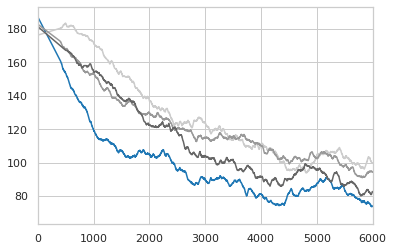

In [170]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
sns.set_theme(style="whitegrid")


# np.savetxt('mazebig_comp_multi.txt',total_reward,fmt='%d')


r = np.array(np.loadtxt('mazebig_comp_multi.txt',dtype='int')).T
r2 = np.array(np.loadtxt('mazebig_comp_g06.txt',dtype='int')).T
r3 = np.array(np.loadtxt('mazebig_comp_g09.txt',dtype='int')).T
r4 = np.array(np.loadtxt('mazebig_xyrgqgav5l.txt',dtype='int')).T

plt.plot(savgol_filter(np.array(r),801,1).T,color='tab:blue')
plt.plot(savgol_filter(np.array(r2),801,1).T,color=[0.8,0.8,0.8])
plt.plot(savgol_filter(np.array(r3),801,1).T,color=[0.6,0.6,0.6])
plt.plot(savgol_filter(np.array(r4),1001,1).T,color=[0.4,0.4,0.4])
plt.xlim([0,6000])

    
plt.savefig('demo.png', transparent=True)

In [151]:
np.savetxt('mazebig_comp_g06.txt',r2,fmt='%d')

# Two-alternative Multi-gamma experiment

In [1]:
import numpy as np
from mazelab import BaseMaze
from mazelab import Object
from mazelab import DeepMindColor as color


class Maze(BaseMaze):
    @property
    def size(self):
        return x.shape
    
    def make_objects(self):
        free = Object('free', 0, color.free, False, np.stack(np.where(x == 0), axis=1))
        obstacle = Object('obstacle', 1, color.obstacle, True, np.stack(np.where(x == 1), axis=1))
        agent = Object('agent', 2, color.agent, False, [])
        goal = Object('goal', 3, color.goal, False, [])
        return free, obstacle, agent, goal
    
from mazelab import BaseEnv
from mazelab import VonNeumannMotion

import gym
from gym.spaces import Box
from gym.spaces import Discrete


class Env(BaseEnv):
    def __init__(self):
        super().__init__()
        
        self.maze = Maze()
        self.motions = VonNeumannMotion()
        
        self.observation_space = Box(low=0, high=len(self.maze.objects), shape=self.maze.size, dtype=np.uint8)
        self.action_space = Discrete(len(self.motions))
        
    def step(self, action):
        motion = self.motions[action]
        current_position = self.maze.objects.agent.positions[0]
        new_position = [current_position[0] + motion[0], current_position[1] + motion[1]]
        valid = self._is_valid(new_position)
        if valid:
            self.maze.objects.agent.positions = [new_position]
        
        if self._is_goal(new_position):
            reward = +1
            done = True
        elif not valid:
            reward = -1
            done = False
        else:
            reward = -0.01
            done = False
        return self.maze.to_value(), reward, done, {}
        
    def reset(self):
        self.maze.objects.agent.positions = start_idx
        self.maze.objects.goal.positions = goal_idx
        return self.maze.to_value()
    
    def _is_valid(self, position):
        nonnegative = position[0] >= 0 and position[1] >= 0
        within_edge = position[0] < self.maze.size[0] and position[1] < self.maze.size[1]
        passable = not self.maze.to_impassable()[position[0]][position[1]]
        return nonnegative and within_edge and passable
    
    def _is_goal(self, position):
        out = False
        for pos in self.maze.objects.goal.positions:
            if position[0] == pos[0] and position[1] == pos[1]:
                out = True
                break
        return out
    
    def get_image(self):
        return self.maze.to_rgb()

In [2]:
env_name='RandomMaze-v0'
gym.envs.register(id=env_name, entry_point=Env, max_episode_steps=200)

In [22]:
def maze_gen(L1,L2,size):
    x = np.ones((size,size))
    mid = int((size-1)/2)
    x[mid,mid:mid+L2] = 0
    x[mid:mid+L1,mid] = 0
    return x


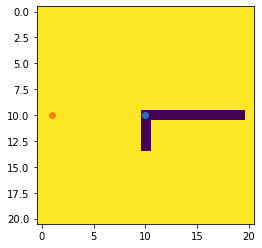

In [127]:
import matplotlib.pyplot as plt
plt.imshow(maze_gen(4,10,21))
plt.plot(10,10,'o')
plt.plot(1,10,'o')

In [209]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
import random as rand

size=21
mid = int((size-1) / 2)

iterations = 1
total_return = []
est0 , est1 , est2 , est3 , est4 , est5 , est6 = [] , [] , [] , [] , [] , [] , []
for iteration in range(iterations):
    env_name='RandomMaze-v0'
    lr=1e-3
#     lr=1e-2
    epochs=10000
    batch_size=300
    render=False
    epsilon=0.1

    # make environment, check spaces, get obs / act dims
    num_actions = 2
    env = gym.make('RandomMaze-v0')

#     L = env.maze.objects.free.positions
#     goal_idx = [L[np.random.randint(0, len(L))]]

    class policy_net(nn.Module):
        def __init__(self, input_shape, n_actions):
            super(policy_net, self).__init__()


            self.fc = nn.Sequential(

#                 nn.Linear(input_shape,  n_actions)
                
                nn.Linear(input_shape, n_actions),
#                 nn.ReLU(),
#                 nn.Linear(2, n_actions)
            )

        def forward(self, x):
            return self.fc(x)


    # make function to compute action distribution
    def get_policy(obs):
        logits = logits_net(obs)
#         logits = obs
        return Categorical(logits=logits)

    # make action selection function (outputs int actions, sampled from policy)
    def get_action(obs):
        return get_policy(obs).sample().item()

    # make loss function whose gradient, for the right data, is policy gradient
    def compute_loss(obs, act, weights):
        logp = get_policy(obs).log_prob(act)
        return -(logp * weights).mean()

    def reward_to_go(rews):
        n = len(rews)
        rtgs = np.zeros_like(rews)
        for i in reversed(range(n)):
            rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
        return rtgs

# 
    NUM_GAMMAS = 3

    GAMMAS = [0.6,0.9,0.98]

    Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))

    # make core of policy network

    logits_net = policy_net(2*NUM_GAMMAS,2).to('cuda')

    # make optimizer
    optimizer = optim.Adam(logits_net.parameters(), lr=lr)

    # for training policy
    def train_one_epoch():
        # make some empty lists for logging.
        batch_obs = []          # for observations
        batch_acts = []         # for actions
        batch_weights = []      # for R(tau) weighting in policy gradient
        batch_rets = []         # for measuring episode returns
        batch_lens = []         # for measuring episode lengths
        corrects = []
        # reset episode-specific variables
        obs = env.reset()       # first obs comes from starting distribution
        done = False            # signal from environment that episode is over
        ep_rews = []            # list for rewards accrued throughout ep

        # render first episode of each epoch
        finished_rendering_this_epoch = False
        # collect experience by acting in the environment with current policy
        
        while True:

            pos= env.maze.objects.agent.positions[0]*1


            obs = [list(Q_gamma[mid,mid,:,:].flatten())]
            obs = np.array([item for sublist in obs for item in sublist])
            obs = obs.flatten()

            # save obs
            batch_obs.append(obs)
            
            # act in the environment
            actions = [1,3]
            if pos[0]==mid and pos[1]==mid:
                if explo==True:
                    act = np.random.choice([0,1],p=[L1/(L1+L2),L2/(L1+L2)])
                else:
                    act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cuda'))
            elif pos[0]>mid:
                act = 0
            elif pos[1]>mid:
                act = 1

            near0 = (Q_gamma[mid,mid,1,0] - Q_gamma[mid,mid,0,0]) / (Q_gamma[mid,mid,2,0] - Q_gamma[mid,mid,1,0])
            near1 = (Q_gamma[mid,mid,1,1] - Q_gamma[mid,mid,0,1]) / (Q_gamma[mid,mid,2,1] - Q_gamma[mid,mid,1,1])
            if pos[0]==mid and pos[1]==mid and L2<L1 and near0 > near1 and explo==False:
                correct=0
            elif pos[0]==mid and pos[1]==mid and L2>L1 and near1 > near0 and explo==False:
                correct=0
            elif pos[0]==mid and pos[1]==mid and L2>L1 and near0 > near1 and explo==False:
                correct=1
            elif pos[0]==mid and pos[1]==mid and L2<L1 and near1 > near0 and explo==False:
                correct=1
            else:
                correct=np.nan
                
            _, rew, done, _ = env.step(actions[act])
            
#             rew = rew + np.random.normal(0,0.1)
            pos_next = env.maze.objects.agent.positions[0]*1
           
                
            utility = rew

            if explo==True:
                for g in range(NUM_GAMMAS):
                    Q_gamma[pos[0],pos[1],g,act] = Q_gamma[pos[0],pos[1],g,act] + 0.2 * (utility +  GAMMAS[g] * np.max(
                                                                                Q_gamma[pos_next[0],pos_next[1],g,:]) - Q_gamma[pos[0],pos[1],g,act])

            
            if rew==1:
#                 rew=20
                done = True
            if rew==-1:
                rew=-1
                
            # save action, reward
            batch_acts.append(act)
            ep_rews.append(rew)
            corrects.append(correct)

            if done:
            
                # if episode is over, record info about episode
                ep_ret, ep_len = sum(ep_rews), len(ep_rews)
                batch_rets.append(ep_ret)
                batch_lens.append(ep_len)
                
                # the weight for each logprob(a|s) is R(tau)
                batch_weights += list(reward_to_go(ep_rews))

                # reset episode-specific variables
    #             start_idx = [L[np.random.randint(0, len(L))]]
                obs, done, ep_rews = env.reset(), False, []


                # end experience loop if we have enough of it
                if len(batch_obs) > batch_size:
                    break

        # take a single policy gradient update step
#         batch_loss = 0

#         optimizer.zero_grad()
#         batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cuda'),
#                                   act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cuda'),
#                                   weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cuda')
#                                   )
#         batch_loss.backward()
#         optimizer.step()
        return batch_loss, batch_rets, batch_lens, corrects

    total_reward = []
    # training loop

    for i in range(epochs):

        clear_output(wait=True)
        change = 5
        explo = False
        if i==0 or i%change==0:
            L1 = rand.randint(2,mid)
            L2 = rand.randint(2,mid)         
            x = maze_gen(L1,L2,size)
            env = gym.make(env_name)
            explo = True
            goal_idx=[[mid+L1,mid],[mid,mid+L2]]
            Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
        start_idx = [[mid,mid]]
        obs = env.reset()
        batch_loss, batch_rets, batch_lens, corrects = train_one_epoch()

        print(iteration)
        print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
                (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))
        total_reward.append(np.nanmean(corrects))

        x_grid,y_grid = np.meshgrid(np.linspace(20,480,size),np.linspace(20,480,size))

        img = env.render('rgb_array')

#         res = 25
#         Qs=np.linspace(0,1,res)
#         policy=np.zeros((res,res))
#         for Q1 in range(res):
#             for Q2 in range(res):
#                 obs = np.array([Qs[Q1],Qs[Q2]])
#                 which = np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cuda')).probs.detach().to('cpu'))
#                 policy[Q1,Q2] = which[0]-which[1]
#         plt.imshow(policy); plt.colorbar(); 
#         plt.plot(1,19,'ro'); plt.show(); 
        
        plt.plot([L1,L2],[Q_gamma[mid,mid,-1,0],Q_gamma[mid,mid,-1,1]],'ro')
        plt.plot([L1,L2],[Q_gamma[mid,mid,-1,0],Q_gamma[mid,mid,-1,1]],'r')
        plt.plot([L1,L2],[Q_gamma[mid,mid,-2,0],Q_gamma[mid,mid,-2,1]],'bo')
        plt.plot([L1,L2],[Q_gamma[mid,mid,-2,0],Q_gamma[mid,mid,-2,1]],'b')
        plt.plot([L1,L2],[Q_gamma[mid,mid,-3,0],Q_gamma[mid,mid,-3,1]],'go')
        plt.plot([L1,L2],[Q_gamma[mid,mid,-3,0],Q_gamma[mid,mid,-3,1]],'g')
        plt.xlim([0,11]); plt.grid(b=True); plt.show()
        
#         plt.subplot(1,4,1)
#         plt.imshow(Q_gamma[:,:,-1,0]); plt.title('down'); plt.colorbar(); 
#         plt.subplot(1,4,2)
#         plt.imshow(Q_gamma[:,:,-1,1]); plt.title('up');plt.colorbar(); 

#         plt.show()



#         plt.imshow(img); plt.show()
        plt.plot(total_reward,'o');  plt.grid(b=True); plt.show()
#         plt.imshow(Q_gamma[:,:,-1,1]); plt.colorbar(); plt.show()
    total_return.append(total_reward)


KeyboardInterrupt: 

In [187]:
np.shape(corrects)

(306,)

In [212]:
np.nanmean(total_reward)

0.9882005899705014

In [66]:
rew

NameError: name 'rew' is not defined

In [72]:
_, rew, done, _ = env.step(1)
rew

-0.01

0
epoch:  99 	 loss: 0.015 	 return: 0.574 	 ep_len: 1.000


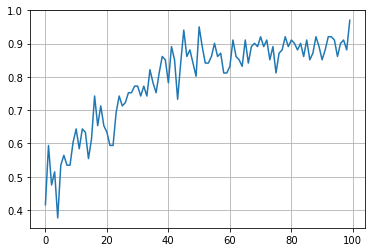

In [624]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
import random as rand


gammas=np.array([0.6])




lr=1e-3
epochs=100
batch_size=100

# make environment, check spaces, get obs / act dims
num_actions = 2

class policy_net(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(policy_net, self).__init__()


        self.fc = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, n_actions)
        )

    def forward(self, x):
        return self.fc(x)


# make function to compute action distribution
def get_policy(obs):
    logits = logits_net(obs)
    return Categorical(logits=logits)

# make action selection function (outputs int actions, sampled from policy)
def get_action(obs):
    return get_policy(obs).sample().item()

# make loss function whose gradient, for the right data, is policy gradient
def compute_loss(obs, act, weights):
    logp = get_policy(obs).log_prob(act)
    return -(logp * weights).mean()

def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs


logits_net = policy_net(2*(len(gammas)),num_actions).to('cuda')

optimizer = optim.Adam(logits_net.parameters(), lr=lr)


alpha = 0.15
max_L=13

    
def train_one_epoch():
    # make some empty lists for logging.
    batch_obs = []          # for observations
    batch_acts = []         # for actions
    batch_weights = []      # for R(tau) weighting in policy gradient
    batch_rets = []         # for measuring episode returns
    batch_lens = []         # for measuring episode lengths
    corrects = []
    # reset episode-specific variables
    obs = env.reset()       # first obs comes from starting distribution
    done = False            # signal from environment that episode is over
    ep_rews = []            # list for rewards accrued throughout ep


    while True:

        alpha = np.random.uniform(low=0.05,high=0.25)
        L1 = np.random.choice([5,7])
        L2 = np.random.choice([5,7])  
        
        while L1==L2:
            L1 = np.random.choice([5,7])
            L2 = np.random.choice([5,7])
            
        if L1<L2:
            it1 = np.random.choice(range(1,70))
            it2 = np.random.choice(range(50,100))
        else:
            it1 = np.random.choice(range(50,100))
            it2 = np.random.choice(range(1,70))
#         r1 = gammas[-1]**L1
#         r2 = gammas[-1]**L2
        r1 = np.array((L1<L2)*1)
        r2 = np.array((L2<L1)*1)
        
        V1=np.zeros((L1,len(gammas)))
        V1[L1-1,:]=1
        V2=np.zeros((L2,len(gammas)))
        V2[L2-1,:]=1

        alpha = np.random.uniform(low=0.05,high=0.2)
        for n in range(it1):
            for i in reversed(range(L1-1)):
                for j in reversed(range(len(gammas))):
                    V1[i,j]=V1[i,j]+ alpha*(gammas[j]*V1[i+1,j] - V1[i,j])
                    
        alpha = np.random.uniform(low=0.05,high=0.2)
        for n in range(it2):
            for i in reversed(range(L2-1)):
                for j in reversed(range(len(gammas))):
                    V2[i,j]=V2[i,j]+ alpha*(gammas[j]*V2[i+1,j] - V2[i,j]) 
                    
#         obs = [list(np.array([V1[0,1]-V1[0,0],V1[0,2]-V1[0,1]]).flatten()),list(np.array([V2[0,1]-V2[0,0],V2[0,2]-V2[0,1]]).flatten())]
        obs = [list(np.array([V1[0,:]]).flatten()),list(np.array([V2[0,:]]).flatten())]
        obs = np.array([item for sublist in obs for item in sublist])
        obs = obs.flatten()

        # save obs
        batch_obs.append(obs)


        act = np.random.choice([0,1])
            
        plan = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cuda'))
        if act==0:
            rew = r1
        elif act==1:
            rew = r2 

        correct=0
        if r1>r2 and plan==0:
            correct=1
        elif r2>r1 and plan==1:
            correct=1
        elif r1==r2:
            correct = np.nan

        done = True

        # save action, reward
        batch_acts.append(act)
        ep_rews.append(rew)
        corrects.append(correct)

        if done:

            # if episode is over, record info about episode
            ep_ret, ep_len = sum(ep_rews), len(ep_rews)
            batch_rets.append(ep_ret)
            batch_lens.append(ep_len)

            # the weight for each logprob(a|s) is R(tau)
            batch_weights += list(reward_to_go(ep_rews))

            # reset episode-specific variables
#             start_idx = [L[np.random.randint(0, len(L))]]
            done, ep_rews = False, []

            # end experience loop if we have enough of it
            if len(batch_obs) > batch_size:
                break

    # take a single policy gradient update step
        optimizer.zero_grad()
        batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cuda'),
                                  act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cuda'),
                                  weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cuda')
                                  )
        batch_loss.backward()
        optimizer.step()
    return batch_loss, batch_rets, batch_lens, corrects

total_reward = []
# training loop

for i in range(epochs):
    if i<50 or i%5==0:
        explo=True
    else:
        explo=False
    clear_output(wait=True)

    batch_loss, batch_rets, batch_lens, corrects = train_one_epoch()

    print(iteration)
    print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
            (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))
    
    total_reward.append(np.nanmean(corrects))

    plt.plot(total_reward);  plt.grid(b=True); plt.show()
        
# plt.figure()
# plt.subplot(1,2,1)
# plt.plot(L1+0*gammas,V1[0,:],marker='o'); plt.grid(b=True)
# plt.subplot(1,2,2)
# plt.plot(L2+0*gammas,V2[0,:],marker='o'); plt.grid(b=True)


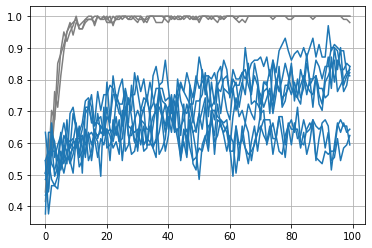

In [625]:
from scipy.signal import savgol_filter

smooth=3
np.savetxt('two_paths_g06_3.txt',total_reward)

m_1 = np.array(np.loadtxt('two_paths_multi_1.txt'))
m_2 = np.array(np.loadtxt('two_paths_multi_2.txt'))
m_3 = np.array(np.loadtxt('two_paths_multi_3.txt'))

g099_1 = np.array(np.loadtxt('two_paths_g099_1.txt'))
g099_2 = np.array(np.loadtxt('two_paths_g099_2.txt'))
g099_3 = np.array(np.loadtxt('two_paths_g099_3.txt'))

g09_1 = np.array(np.loadtxt('two_paths_g09_1.txt'))
g09_2 = np.array(np.loadtxt('two_paths_g09_2.txt'))
g09_3 = np.array(np.loadtxt('two_paths_g09_3.txt'))

g06_1 = np.array(np.loadtxt('two_paths_g06_1.txt'))
g06_2 = np.array(np.loadtxt('two_paths_g06_2.txt'))

plt.figure;
plt.plot(m_1,color='tab:grey')
plt.plot(m_2,color='tab:grey')
plt.plot(m_3,color='tab:grey')

plt.plot(g099_1,color='tab:blue')
plt.plot(g099_2,color='tab:blue')
plt.plot(g099_3,color='tab:blue')

plt.plot(g09_1,color='tab:blue')
plt.plot(g09_2,color='tab:blue')
plt.plot(g09_3,color='tab:blue')

plt.plot(g06_1,color='tab:blue')
plt.plot(g06_2,color='tab:blue')

plt.grid(b=True)
# plt.plot(savgol_filter(np.array(r14),801,1).T,color='tab:green',alpha=0.8)plt.plot(total_reward)
plt.savefig('demo.png', transparent=True)

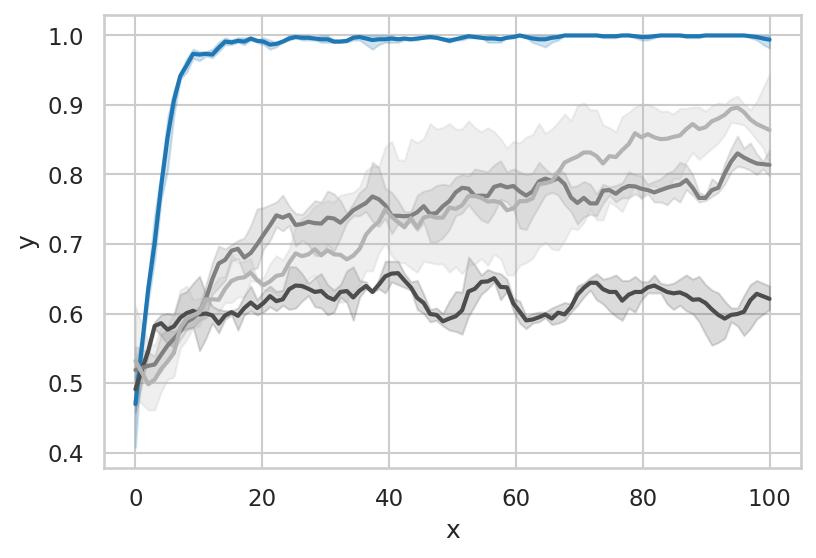

In [631]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

m_1 = np.array(np.loadtxt('two_paths_multi_1.txt'))
m_2 = np.array(np.loadtxt('two_paths_multi_2.txt'))
m_3 = np.array(np.loadtxt('two_paths_multi_3.txt'))

g099_1 = np.array(np.loadtxt('two_paths_g099_1.txt'))
g099_2 = np.array(np.loadtxt('two_paths_g099_2.txt'))
g099_3 = np.array(np.loadtxt('two_paths_g099_3.txt'))

g09_1 = np.array(np.loadtxt('two_paths_g09_1.txt'))
g09_2 = np.array(np.loadtxt('two_paths_g09_2.txt'))
g09_3 = np.array(np.loadtxt('two_paths_g09_3.txt'))

g06_1 = np.array(np.loadtxt('two_paths_g06_1.txt'))
g06_2 = np.array(np.loadtxt('two_paths_g06_2.txt'))
g06_3 = np.array(np.loadtxt('two_paths_g06_3.txt'))

max_plot=100
min_plot=0
smooth=5
smooth1=3

multi=[savgol_filter(m_1,smooth1,1).T[min_plot:max_plot],
          savgol_filter(m_2,smooth1,1).T[min_plot:max_plot],
             savgol_filter(m_3,smooth1,1).T[min_plot:max_plot]
            ]
x=[np.linspace(0,max_plot,len(multi[i])) for i in range(0,len(multi))]


g099=[savgol_filter(g099_1,smooth,1).T[min_plot:max_plot],
          savgol_filter(g099_2,smooth,1).T[min_plot:max_plot],
             savgol_filter(g099_3,smooth,1).T[min_plot:max_plot]
            ]

g09=[savgol_filter(g09_1,smooth,1).T[min_plot:max_plot],
          savgol_filter(g09_2,smooth,1).T[min_plot:max_plot],
             savgol_filter(g09_3,smooth,1).T[min_plot:max_plot]
            ]
g06=[savgol_filter(g06_1,smooth,1).T[min_plot:max_plot],
          savgol_filter(g06_2,smooth,1).T[min_plot:max_plot],
             savgol_filter(g06_3,smooth,1).T[min_plot:max_plot]
            ]

df1= pd.DataFrame({"y" : np.concatenate(np.array(multi)),
                  "x" : np.concatenate(np.array(x)),
                 })

df2= pd.DataFrame({"y" : np.concatenate(np.array(g099)),
                  "x" : np.concatenate(np.array(x)),
                 })
df3= pd.DataFrame({"y" : np.concatenate(np.array(g09)),
                  "x" : np.concatenate(np.array(x)),
                 })
df4= pd.DataFrame({"y" : np.concatenate(np.array(g06)),
                  "x" : np.concatenate(np.array(x)),
                 })
plt.figure(dpi=150)
fig=sns.lineplot(x="x", y="y", data=df1,color='tab:blue',linewidth=2)
fig=sns.lineplot(x="x", y="y", data=df2,color=[0.3,0.3,0.3],linewidth=2)
fig=sns.lineplot(x="x", y="y", data=df3,color=[0.5,0.5,0.5],linewidth=2)
fig=sns.lineplot(x="x", y="y", data=df4,color=[0.7,0.7,0.7],linewidth=2)
# fig=sns.lineplot(x="x_one_gamma", y="one_gamma", data=df4,color='dimgrey',ci=68,linestyle='--')
# fig=sns.lineplot(x="x_best_gamma", y="best_gamma", data=df5,color='tab:blue',ci=68,linestyle='--')
plt.grid(b=True)

plt.savefig('demo.png', transparent=True)

# GVFs for exploration

In [1042]:
def flower(state,action):
    terminals = [3,6,9,12,15,18,21,28]
    done = False
    if state==0:
        if action==0:
            state_next = 1
        elif action==1:
            state_next = 4
        elif action==2:
            state_next = 7
        elif action==3:
            state_next = 10
        elif action==4:
            state_next = 13
        elif action==5:
            state_next = 16
        elif action==6:
            state_next = 19
        elif action==7:
            state_next = 22
    elif state not in terminals:
        state_next = state + 1
    else:
        state_next = state
        done=True
    return state_next, done

def random_flower(state,action,action_shuffle):
    terminals = [3,6,9,12,15,18,21,28]
    done = False
    if state==0:
        if action==action_shuffle[0]:
            state_next = 1
        elif action==action_shuffle[1]:
            state_next = 4
        elif action==action_shuffle[2]:
            state_next = 7
        elif action==action_shuffle[3]:
            state_next = 10
        elif action==action_shuffle[4]:
            state_next = 13
        elif action==action_shuffle[5]:
            state_next = 16
        elif action==action_shuffle[6]:
            state_next = 19
        elif action==action_shuffle[7]:
            state_next = 22
    elif state not in terminals:
        state_next = state + 1
    else:
        state_next = state
        done=True
    return state_next, done

Random exploration

In [976]:
import numpy as np
import matplotlib.pyplot as plt
num_actions = 8
num_states = 29

counts = []
for iteration in range(10000):
    rewarded_state = 6
    state , terminal = 0 , True
    count=0
    while state != rewarded_state:
        if terminal==True:
            state = 0
            action = np.random.choice(range(num_actions))
            state_next , terminal = flower(state,action)
        else:
            action = 0
            state_next , terminal = flower(state,action)
        state = state_next
        count+=1
    counts.append(count)

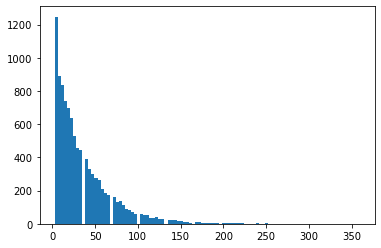

In [977]:
plt.figure()
plt.hist(counts,100); plt.show()

In [978]:
np.mean(counts)

35.2436

Intrinsic Motivation Agent

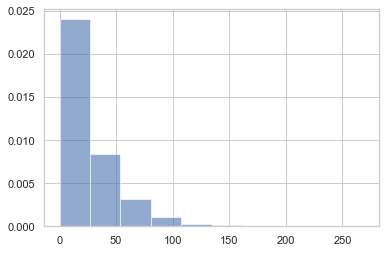

In [1125]:
num_actions = 8
num_states = 29

counts = []
Qs=[]
for iteration in range(10000):
    Q = np.zeros((num_actions))
    intrinsic = np.zeros((num_states))
    rewarded_state = np.random.choice(range(num_states))
    rewarded_state = 28
    state , terminal = 0 , True
    count=0
    length = np.random.choice(range(0,10))
    l = 0
    reward = 0
    traj=[]
    while state != rewarded_state:        
        intrinsic[state] = intrinsic[state] - 1
        
        if state==0:
            action = np.random.choice(np.where(Q[:]==np.max(Q[:]))[0])
            action = np.random.choice(range(num_actions))
            state_next , terminal = flower(state,action)     
        else:
            state_next , terminal = flower(state,0) 

                
        reward = intrinsic[state]
        if intrinsic[state]<-1:
            reward=-1
#         if l==length and terminal==False :
#             reward = 1
#         if reward>1:
#             reward=1
            
        if terminal==True or l==length:
            Q[action] = Q[action] + 0.2 * (reward - Q[action])
            reward = 0
            state = 0
            length = np.random.choice(range(0,10))
            l=0
            count+=1
        else:
            state = state_next
            l = l+1
            
        traj.append(state)
    counts.append(count)
    Qs.append(Q)
    

plt.figure()
plt.hist(counts,density=True,alpha=0.6,);



In [1126]:
np.mean(counts)

25.5054

In [1041]:
Q

array([ 0.    , -0.1   ,  0.    ,  0.    ,  0.    ,  0.    , -0.0361,
        0.1   ])

GVFs + PG

In [1077]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
import itertools
from scipy.signal import savgol_filter

/opt/anaconda3/envs/virtEnv/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


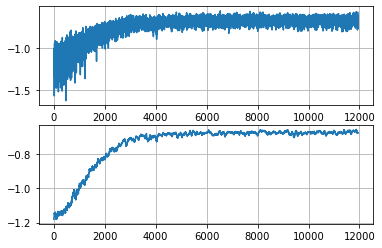

KeyboardInterrupt: 

In [1090]:
lr=1e-3
epochs=5000
batch_size=500

num_actions = 8
num_states = 29
batch_size = 1000
device = 'cpu'
    
class policy_net(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(policy_net, self).__init__()

        self.fc = nn.Sequential(

            nn.Linear(input_shape, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, n_actions)
        )

    def forward(self, x):
        return self.fc(x)


# make function to compute action distribution
def get_policy(obs):
    logits = logits_net(obs)
    return Categorical(logits=logits)

# make action selection function (outputs int actions, sampled from policy)
def get_action(obs):
    return get_policy(obs).sample().item()

# make loss function whose gradient, for the right data, is policy gradient
def compute_loss(obs, act, weights):
    logp = get_policy(obs).log_prob(act)
    return -(logp * weights).mean()

def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs


num_gvfs = 2*num_actions

# make core of policy network
logits_net = policy_net(num_gvfs ,num_actions).to(device)

# make optimizer
optimizer = optim.Adam(logits_net.parameters(), lr=lr)

total_reward = []
for iteration in range(100000):
    # make some empty lists for logging.
    batch_obs = []          # for observations
    batch_acts = []         # for actions
    batch_weights = []      # for R(tau) weighting in policy gradient
    batch_rets = []         # for measuring episode returns
    batch_lens = []         # for measuring episode lengths

    # reset episode-specific variables
    ep_rews = []            # list for rewards accrued throughout ep
    is_done = False
    while True:
        V_repeat = np.zeros((num_actions))
        V_frontier = np.zeros((num_actions))
        intrinsic = np.zeros((num_states))
        rewarded_state = np.random.choice(range(num_states))
        rewarded_state = 6
        state , terminal = 0 , True
        length = np.random.choice(range(0,10))
        l = 0
        reward_repeat = 0
        reward_frontier = 0
        action_shuffle = np.random.permutation(range(num_actions))
        while state != rewarded_state:        
            intrinsic[state] = intrinsic[state] - 1
        
            if state==0:
                obs = [list(V_repeat[:].flatten()),
                       list(V_frontier[:].flatten())]
                obs = np.array([item for sublist in obs for item in sublist])
                obs = obs.flatten()
                action = get_action(torch.as_tensor(obs, dtype=torch.float32).to(device))
                state_next , terminal = random_flower(state,action,action_shuffle)  
                
                batch_obs.append(obs)
                batch_acts.append(action)
                ep_rews.append(-0.1)
            else:
                state_next , terminal = random_flower(state,0,action_shuffle) 
            
            reward_repeat = intrinsic[state]
            if reward_repeat<-1:
                reward_repeat=-1
                
            if l==length and terminal==False:
                reward_frontier = 1
            
            if terminal==True or l==length:
                V_repeat[action] = V_repeat[action] + 0.2 * (reward_repeat - V_repeat[action])
                V_frontier[action] = V_frontier[action] + 0.2 * (reward_frontier - V_frontier[action])
                reward_repeat = 0
                reward_frontier = 0
                state = 0
                length = np.random.choice(range(0,10))
                l=0
            else:
                state = state_next
                l = l+1
                
            
    
        # if episode is over, record info about episode
        ep_ret, ep_len = sum(ep_rews), len(ep_rews)
        batch_rets.append(ep_ret)
        batch_lens.append(ep_len)

        # the weight for each logprob(a|s) is R(tau)
        batch_weights += list(reward_to_go(ep_rews))

        # reset episode-specific variables
#             timestep = env.reset()
        ep_rews =  []
#             env.step(0)

        # end experience loop if we have enough of it
        if len(batch_obs) > batch_size:
            break


    # take a single policy gradient update step
    batch_loss = 0 
    optimizer.zero_grad()
    batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to(device),
                              act=torch.as_tensor(batch_acts, dtype=torch.int32).to(device),
                              weights=torch.as_tensor(batch_weights, dtype=torch.float32).to(device)
                              )
    batch_loss.backward()
    optimizer.step()

    total_reward.append(np.mean(batch_rets))
    
    clear_output(wait=True)  
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(total_reward); plt.grid(b=True); 
    plt.subplot(2,1,2)
    if len(total_reward)>51:
        plt.plot(savgol_filter(total_reward,51,1)); plt.grid(b=True); 
    plt.show()   
        

/opt/anaconda3/envs/virtEnv/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


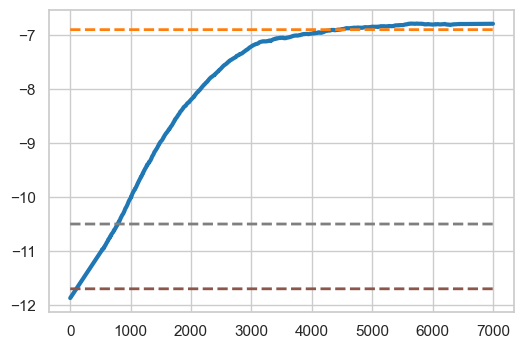

In [1134]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
sns.set_theme(style="whitegrid")


# np.savetxt('explo_short.txt',total_reward)


r = np.array(np.loadtxt('explo_short.txt')).T
r = r[0:7000]
plt.figure(dpi=100)
plt.plot(10*savgol_filter(np.array(r),1001,1).T,color='tab:blue',linewidth=3)
plt.plot(-6.9+0*r,color='tab:orange',linewidth=2,linestyle='--')
plt.plot(-10.5+0*r,color='tab:grey',linewidth=2,linestyle='--')
plt.plot(-11.7+0*r,color='tab:brown',linewidth=2,linestyle='--')

# plt.xlim([-200,70000])
# plt.ylim([3.7,12.3])
    
plt.savefig('demo.png', transparent=True)

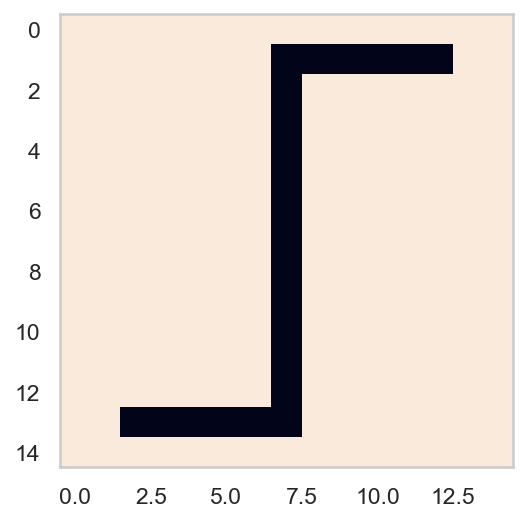

In [1138]:
plt.figure(dpi=150)
x = np.ones((15,15))
x[1:14,7]=0
x[13,2:7]=0
x[1,7:13]=0
plt.imshow(x); plt.grid(b=False)

# Bandits GVF

In [ ]:
import numpy as np

In [ ]:
payoffA = 0.5
payoffB = 0.8
num_trials=20

for t in range(num_trials):
    choice = np.random.choice([0,1])
    if choice==0:
        output = np.random.uniform()

/opt/anaconda3/envs/virtEnv/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


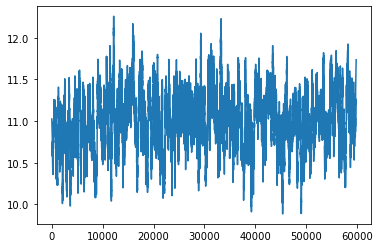

KeyboardInterrupt: 

In [252]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
from scipy.signal import savgol_filter

lr=5e-4
epochs=1000000
batch_size=10
device = 'cpu'

class policy_net(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(policy_net, self).__init__()


        self.fc = nn.Sequential(

            nn.Linear(input_shape, 25),
            nn.ReLU(),
            nn.Linear(25, 25),
            nn.ReLU(),
            nn.Linear(25, n_actions)
        )

    def forward(self, x):
        return self.fc(x)


# make function to compute action distribution
def get_policy(obs):
    logits = logits_net(obs)
#         logits = obs
    return Categorical(logits=logits)

# make action selection function (outputs int actions, sampled from policy)
def get_action(obs):
    return get_policy(obs).sample().item()

# make loss function whose gradient, for the right data, is policy gradient
def compute_loss(obs, act, weights):
    logp = get_policy(obs).log_prob(act)
    return -(logp * weights).mean()

def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs

# 

# make core of policy network
logits_net = policy_net(4,2).to(device)

# make optimizer
optimizer = optim.Adam(logits_net.parameters(), lr=lr)

# for training policy
def train_one_epoch():
    global sA,fA,sB,fB,payoffA,payoffB
    # make some empty lists for logging.
    batch_obs = []          # for observations
    batch_acts = []         # for actions
    batch_weights = []      # for R(tau) weighting in policy gradient
    batch_rets = []         # for measuring episode returns
    batch_lens = []         # for measuring episode lengths

    # reset episode-specific variables
    done = False            # signal from environment that episode is over
    ep_rews = []            # list for rewards accrued throughout ep

    while True:

        pA = (sA + 1)/(sA+fA+2)
        pB = (sB + 1)/(sB+fB+2)
        nA = sA + fA
        nB = sB + fB

        obs = [pA,pB,nA,nB]


        # save obs
        batch_obs.append(obs)

        act = get_action(torch.as_tensor(obs, dtype=torch.float32).to(device))

        if act==0:
            rew = (np.random.uniform(0,1)>payoffA)*1
            if rew==0:
                fA = fA + 1
            elif rew==1:
                sA = sA + 1
        elif act==1:
            rew = (np.random.uniform(0,1)>payoffB)*1
            if rew==0:
                fB = fB + 1
            elif rew==1:
                sB = sB + 1
                
                
        if nA+nB>20:
            done = True
        

        # save action, reward
        batch_acts.append(act)
        ep_rews.append(rew)


            
        if done:

            # if episode is over, record info about episode
            ep_ret, ep_len = sum(ep_rews), len(ep_rews)
            batch_rets.append(ep_ret)
            batch_lens.append(ep_len)

            # the weight for each logprob(a|s) is R(tau)
            batch_weights += list(reward_to_go(ep_rews))

            # reset episode-specific variables
#             start_idx = [L[np.random.randint(0, len(L))]]
            done, ep_rews =  False, []
            
            sA = 0
            sB = 0
            fA = 0
            fB = 0
            if np.random.uniform(0,1)>0.5:
                payoffA = 0.7
                payoffB = 0.3
            else:
                payoffA = 0.3
                payoffB = 0.7
            # end experience loop if we have enough of it
            if len(batch_obs) > batch_size:
                break

    # take a single policy gradient update step
    optimizer.zero_grad()
    batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cpu'),
                              act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cpu'),
                              weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cpu')
                              )
    batch_loss.backward()
    optimizer.step()
    return batch_loss, batch_rets, batch_lens

total_reward = []
# training loop

for i in range(epochs):

#     payoffA = np.random.uniform(0,1)
#     payoffB = np.random.uniform(0,1)
    if np.random.uniform(0,1)>0.5:
        payoffA = 0.7
        payoffB = 0.3
    else:
        payoffA = 0.3
        payoffB = 0.7
    sA = 0
    sB = 0
    fA = 0
    fB = 0

    batch_loss, batch_rets, batch_lens = train_one_epoch()
#         print(start_idx)
#     print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
#             (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))

    total_reward.append(np.mean(batch_rets))

#     plt.plot(total_reward);  plt.show()
    if i%100==0:
        clear_output(wait=True)
        if len(total_reward)>202:
            plt.figure()
            plt.plot(savgol_filter(np.array(total_reward),201,1).T,color='tab:blue'); plt.show()


In [38]:
pA = (sA + 1)/(sA+fA+2)
pB = (sB + 1)/(sB+fB+2)
nA = sA + fA
nB = sB + fB

obs = [pA,pB,nA,nB]


act = get_action(torch.as_tensor(obs, dtype=torch.float32).to(device))

In [146]:
logits = logits_net(torch.as_tensor([0.8,0.2,3,3], dtype=torch.float32).to(device))
logits

tensor([ 1.4482, -1.4453], grad_fn=<AddBackward0>)

In [147]:
Categorical(logits=logits).logits

tensor([-0.0539, -2.9473], grad_fn=<SubBackward0>)

In [249]:
action=[]

sA=2
fA=2
sB=1
fB=2
pA = (sA + 1)/(sA+fA+2)
pB = (sB + 1)/(sB+fB+2)
nA = sA + fA
nB = sB + fB

obs = [pA,pB,nA,nB]

for i in range(1000):
    action.append(get_action(torch.as_tensor(obs, dtype=torch.float32).to(device)))
np.mean(action)

0.094

# Convergence Analysis

In [1]:
import numpy as np
from mazelab import BaseMaze
from mazelab import Object
from mazelab import DeepMindColor as color


class Maze(BaseMaze):
    @property
    def size(self):
        return x.shape
    
    def make_objects(self):
        free = Object('free', 0, color.free, False, np.stack(np.where(x == 0), axis=1))
        obstacle = Object('obstacle', 1, color.obstacle, True, np.stack(np.where(x == 1), axis=1))
        agent = Object('agent', 2, color.agent, False, [])
        goal = Object('goal', 3, color.goal, False, [])
        return free, obstacle, agent, goal
    
from mazelab import BaseEnv
from mazelab import VonNeumannMotion

import gym
from gym.spaces import Box
from gym.spaces import Discrete


class Env(BaseEnv):
    def __init__(self):
        super().__init__()
        
        self.maze = Maze()
        self.motions = VonNeumannMotion()
        
        self.observation_space = Box(low=0, high=len(self.maze.objects), shape=self.maze.size, dtype=np.uint8)
        self.action_space = Discrete(len(self.motions))
        
    def step(self, action):
        motion = self.motions[action]
        current_position = self.maze.objects.agent.positions[0]
        new_position = [current_position[0] + motion[0], current_position[1] + motion[1]]
        valid = self._is_valid(new_position)
        if valid:
            self.maze.objects.agent.positions = [new_position]
        
        if self._is_goal(new_position):
            reward = +1
            done = True
        elif not valid:
            reward = -1
            done = False
        else:
            reward = -0.01
            done = False
        return self.maze.to_value(), reward, done, {}
        
    def reset(self):
        self.maze.objects.agent.positions = start_idx
        self.maze.objects.goal.positions = goal_idx
        return self.maze.to_value()
    
    def _is_valid(self, position):
        nonnegative = position[0] >= 0 and position[1] >= 0
        within_edge = position[0] < self.maze.size[0] and position[1] < self.maze.size[1]
        passable = not self.maze.to_impassable()[position[0]][position[1]]
        return nonnegative and within_edge and passable
    
    def _is_goal(self, position):
        out = False
        for pos in self.maze.objects.goal.positions:
            if position[0] == pos[0] and position[1] == pos[1]:
                out = True
                break
        return out
    
    def get_image(self):
        return self.maze.to_rgb()

In [2]:
env_name='RandomMaze-v0'
gym.envs.register(id=env_name, entry_point=Env, max_episode_steps=200)

In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
import gym
from gym.spaces import Discrete, Box
from mazelab.generators import random_maze

iterations = 1
total_return = []
est0 , est1 , est2 , est3 , est4 , est5 , est6 = [] , [] , [] , [] , [] , [] , []
noise=0
for iteration in range(iterations):
    size = 20
    env_name='RandomMaze-v0'
    lr=5e-4
#     lr=1e-2
    epochs=200
    batch_size=1000
    render=False
    epsilon=0.1

    # make environment, check spaces, get obs / act dims
    x = random_maze(width=size, height=size, complexity=1, density=0.5)
    num_actions = 4
    env = gym.make('RandomMaze-v0')

#     L = env.maze.objects.free.positions
#     goal_idx = [L[np.random.randint(0, len(L))]]

    class policy_net(nn.Module):
        def __init__(self, input_shape, n_actions):
            super(policy_net, self).__init__()


            self.fc = nn.Sequential(

#                 nn.Linear(input_shape,  n_actions)
                
                nn.Linear(input_shape, 50),
                nn.ReLU(),
                nn.Linear(50, 50),
                nn.ReLU(),
                nn.Linear(50, n_actions)
            )

        def forward(self, x):
            return self.fc(x)


    # make function to compute action distribution
    def get_policy(obs):
        logits = logits_net(obs)
#         logits = obs
        return Categorical(logits=logits)

    # make action selection function (outputs int actions, sampled from policy)
    def get_action(obs):
        return get_policy(obs).sample().item()

    # make loss function whose gradient, for the right data, is policy gradient
    def compute_loss(obs, act, weights):
        logp = get_policy(obs).log_prob(act)
        return -(logp * weights).mean()

    def reward_to_go(rews):
        n = len(rews)
        rtgs = np.zeros_like(rews)
        for i in reversed(range(n)):
            rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
        return rtgs

# 
    NUM_GAMMAS = 1

    GAMMAS = [0.98]
    sr = np.zeros((size,size,NUM_GAMMAS))
    Q = np.zeros((size,size,num_actions))
    Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
    sr_x = np.zeros((size,size))
    sr_y = np.zeros((size,size))
    sr_x1 = np.zeros((size,size))
    sr_y1 = np.zeros((size,size))
    # make core of policy network
#     logits_net = policy_net(size*size + size*size+NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+num_actions,num_actions).to('cuda')
#     logits_net = policy_net(3*(21)*(21),num_actions).to('cpu')
#     logits_net = policy_net(8+7*NUM_GAMMAS+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+3*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+6*num_actions*NUM_GAMMAS,num_actions).to('cuda')
#     logits_net = policy_net(4+1*num_actions*NUM_GAMMAS,num_actions).to('cuda')

    # make optimizer
#     optimizer = optim.Adam(logits_net.parameters(), lr=lr)

    # for training policy
    def train_one_epoch():
        # make some empty lists for logging.
        batch_obs = []          # for observations
        batch_acts = []         # for actions
        batch_weights = []      # for R(tau) weighting in policy gradient
        batch_rets = []         # for measuring episode returns
        batch_lens = []         # for measuring episode lengths

        # reset episode-specific variables
        obs = env.reset()       # first obs comes from starting distribution
        done = False            # signal from environment that episode is over
        ep_rews = []            # list for rewards accrued throughout ep

        # render first episode of each epoch
        finished_rendering_this_epoch = False
        # collect experience by acting in the environment with current policy
        
        while True:
            est0.append(np.copy(Q_gamma))
            est1.append(np.copy(sr))
            est2.append(np.copy(fut_a_v))
            est3.append(np.copy(fut_a_v2))
            est4.append(np.copy(fut_a_v3))
            est5.append(np.copy(fut_a_v4))
            est6.append(np.copy(fut_a_v5))   
            
            pos= env.maze.objects.agent.positions[0]*1
#             obs[obs==2]=0
#             obs[pos[0],pos[1]]=2
            r_pos = env.maze.objects.goal.positions[0]*1
            obse=obs*1
            obs1 = (obse==2+0*obse)*1
            obs2 = (obse==3+0*obse)*1
            obse[obse==2]=0
            obse[obse==3]=0
            obs = [obse,obs1,obs2]
            obs = np.array([item for sublist in obs for item in sublist])
            obs = obs.flatten()
#             obs[pos[0],pos[1]]=2
#             r_pos = goal_idx[0]*1
#             no_r_pos = no_goal[0]*1
#             obs = np.zeros((size,size))
#             obs[pos[0],pos[1]]=1.
#             obs2 = np.zeros((size,size))
#             obs2[r_pos[0],r_pos[1]]=1.
#             obs = np.array([obs,obs2])
#             obs = obs.flatten()

#             obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
#                    list(fut_a_v[pos[0],pos[1],:,:].flatten()),
#                    list(fut_a_v2[pos[0],pos[1],:,:].flatten()),
#                    list(fut_a_v3[pos[0],pos[1],:,:].flatten()),
#                    list(fut_a_v4[pos[0],pos[1],:,:].flatten()),
#                    list(fut_a_v5[pos[0],pos[1],:,:].flatten()),
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten())]
#             obs = [[(pos[0]-size/2)/25,(pos[1]-size/2)/25,(r_pos[0]-size/2)/25,(r_pos[1]-size/2)/25],
#                    list(Q_gamma[pos[0],pos[1],:,:].flatten())]
            
#             obs = np.array([item for sublist in obs for item in sublist])
#             obs = obs.flatten()


            # save obs
            batch_obs.append(obs)
            
            # act in the environment
#             act = get_action(torch.as_tensor(np.abs(Q_gamma[pos[0],pos[1],-1,:]), dtype=torch.float32).to('cpu'))
            
#             act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cuda'))
            if any([i<5,(i)%change==0,(i-1)%change==0,(i-2)%change==0,(i-3)%change==0,(i-4)%change==0,(i-5)%change==0,(i-6)%change==0,
                    (i-7)%change==0,(i-8)%change==0,(i-9)%change==0,(i-10)%change==0 ,(i-11)%change==0,(i-12)%change==0,(i-13)%change==0,
                   (i-14)%change==0,(i-15)%change==0,(i-16)%change==0,(i-17)%change==0,(i-18)%change==0,(i-19)%change==0]):
                act = np.random.choice([0,1,2,3])
            else:
#                 act = get_action(torch.as_tensor(np.abs(Q_gamma[pos[0],pos[1],-1,:]), dtype=torch.float32).to('cpu'))
#                 act = get_action(torch.as_tensor(obs, dtype=torch.float32).to('cuda'))
                act = np.random.choice([0,1,2,3])
# 
            obs, rew, done, _ = env.step(act)
       
            pos_next = env.maze.objects.agent.positions[0]*1
        
#             pos_next_r = pos*1

#             pos_next_r[0] = np.max([0,np.min([size-1,pos[0]+np.random.choice([1,0,-1])])])
#             pos_next_r[1] = np.max([0,np.min([size-1,pos[1]+np.random.choice([1,0,-1])])])

#             if np.sum(np.sum(L==np.array(pos_next_r),1)==2)==1:
#                 pos_next_r = pos_next_r
#             else:
#                 pos_next_r = pos*1

#             utility_x, utility_y , utility_x1, utility_y1 = 0 , 0 , 0 , 0
#             if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==0:
#                 utility_x = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==0:
#                 utility_y = 0.1
#             if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==0:
#                 utility_x1 = 0.1
#             if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==0:
#                 utility_y1 = 0.1   
                
#             if pos[0]==1:
#                 utility_x = 0.1
#             if pos[1]==1:
#                 utility_y = 0.1
#             if pos[0]==size-2:
#                 utility_x1 = 0.1
#             if pos[1]==size-2:
#                 utility_y1 = 0.1     
                
            utility = pos_next[0]==r_pos[0] and pos_next[1]==r_pos[1]
#             utility_x = (pos_next_r[0]-size/2)/20
#             utility_y = (pos_next_r[1]-size/2)/20
            
#             in_x[pos[0],pos[1]] = in_x[pos[0],pos[1]] + 1 * (utility_x
#                                                                  - in_x[pos[0],pos[1]])
#             in_y[pos[0],pos[1]] = in_y[pos[0],pos[1]] + 1 * (utility_y
#                                                                  - in_y[pos[0],pos[1]])
#             in_x1[pos[0],pos[1]] = in_x1[pos[0],pos[1]] + 1 * (utility_x1
#                                                                  - in_x1[pos[0],pos[1]])
#             in_y1[pos[0],pos[1]] = in_y1[pos[0],pos[1]] + 1 * (utility_y1
#                                                                  - in_y1[pos[0],pos[1]])  
                                    
#             probs = np.array(get_policy(torch.as_tensor(obs, dtype=torch.float32).to('cuda')).probs.detach().to('cpu'))
#             probs = probs+0.1
            probs = [1, 1, 1, 1]
#             if any([i<5,(i)%change==0,(i-1)%change==0,(i-2)%change==0,(i-3)%change==0,(i-4)%change==0,(i-5)%change==0,(i-6)%change==0,
#                     (i-7)%change==0,(i-8)%change==0,(i-9)%change==0,(i-10)%change==0 ,(i-11)%change==0,(i-12)%change==0,(i-13)%change==0,
#                    (i-14)%change==0,(i-15)%change==0,(i-16)%change==0,(i-17)%change==0,(i-18)%change==0,(i-19)%change==0]):
            if True:
                for g in range(NUM_GAMMAS):
                    sr[pos[0],pos[1],g] = sr[pos[0],pos[1],g] + 0.3 * (utility
                                                                        + (1-utility) * GAMMAS[g] * sr[pos_next[0],pos_next[1],g] 
                                                                       - sr[pos[0],pos[1],g])

    #                 sr_x[pos[0],pos[1],g] = sr_x[pos[0],pos[1],g] + 0.1 * (utility_x
    #                                                                     + np.abs(0.1-utility_x)*GAMMAS[g] * sr_x[pos_next[0],pos_next[1],g] 
    #                                                                        - sr_x[pos[0],pos[1],g])

    #                 sr_y[pos[0],pos[1],g] = sr_y[pos[0],pos[1],g] + 0.1 * (utility_y
    #                                                                     + np.abs(0.1-utility_y)*GAMMAS[g] * sr_y[pos_next[0],pos_next[1],g]
    #                                                                        - sr_y[pos[0],pos[1],g])

    #                 sr_x1[pos[0],pos[1],g] = sr_x1[pos[0],pos[1],g] + 0.1 * (utility_x1
    #                                                                     + np.abs(0.1-utility_x1)*GAMMAS[g] * sr_x1[pos_next[0],pos_next[1],g] 
    #                                                                          - sr_x1[pos[0],pos[1],g])

    #                 sr_y1[pos[0],pos[1],g] = sr_y1[pos[0],pos[1],g] + 0.1 * (utility_y1
    #                                                                     + np.abs(0.1-utility_y1)*GAMMAS[g] * sr_y1[pos_next[0],pos_next[1],g] 
    #                                                                          - sr_y1[pos[0],pos[1],g])

    #                 fut_x[pos[0],pos[1],g] = fut_x[pos[0],pos[1],g] + 0.1 * ((pos[0]-size/2)/20
    #                                                                     + GAMMAS[g] * fut_x[pos_next[0],pos_next[1],g] 
    #                                                                        - fut_x[pos[0],pos[1],g])

    #                 fut_y[pos[0],pos[1],g] = fut_y[pos[0],pos[1],g] + 0.1 * ((pos[1]-size/2)/20
    #                                                                     + GAMMAS[g] * fut_y[pos_next[0],pos_next[1],g]
    #                                                                        - fut_y[pos[0],pos[1],g])

    #                 fut_stx[pos[0],pos[1],g,act] = fut_stx[pos[0],pos[1],g,act] +  0.1 * ((pos[0])/20
    #                                                                     + GAMMAS[g] * fut_stx[pos_next_r[0],pos_next_r[1],g,act] 
    #                                                                        - fut_stx[pos[0],pos[1],g,act])


    #                 fut_sty[pos[0],pos[1],g,act] = fut_sty[pos[0],pos[1],g,act] +  0.1 * ((pos[1])/20
    #                                                                     + GAMMAS[g] * fut_sty[pos_next_r[0],pos_next_r[1],g,act] 
    #                                                                        - fut_sty[pos[0],pos[1],g,act])                


#                     if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,0] = fut_st[pos[0],pos[1],g,0] + (1/probs[1]) * 0.2 * ((pos[0]+1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0]+1,pos[1],g,0] 
#                                                                                - fut_st[pos[0],pos[1],g,0])


#                     if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,1] = fut_st[pos[0],pos[1],g,1] + (1/probs[0]) * 0.2 * ((pos[0]-1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0]-1,pos[1],g,1] 
#                                                                                - fut_st[pos[0],pos[1],g,1])


#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,2] = fut_st[pos[0],pos[1],g,2] + (1/probs[2]) * 0.2 * ((pos[1]-1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0],pos[1]-1,g,2] 
#                                                                                - fut_st[pos[0],pos[1],g,2])

#                     if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
#                         fut_st[pos[0],pos[1],g,3] = fut_st[pos[0],pos[1],g,3] + (1/probs[3]) * 0.2 * ((pos[1]+1-size/2)/20
#                                                                             + GAMMAS[g] * fut_st[pos[0],pos[1]+1,g,3] 
#                                                                                - fut_st[pos[0],pos[1],g,3])


                    theta_sr = 0.1; theta_sr1 = 0.6;  learnin_rate = 0.6; size=19
                    #LEVEL 1
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]<size):
#                     if pos_next[0]==pos[0]+1 and pos_next[1]==pos[1]:
                        ut = pos[0]+1==r_pos[0] and pos[1]==r_pos[1]
                        fut_a_v[pos[0],pos[1],g,0] = fut_a_v[pos[0],pos[1],g,0] + (1/probs[0]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]>0):
#                     if pos_next[0]==pos[0]-1 and pos_next[1]==pos[1]:
#                         ut = (sr[pos[0]-1,pos[1],g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        ut = pos[0]-1==r_pos[0] and pos[1]==r_pos[1]
                        fut_a_v[pos[0],pos[1],g,1] = fut_a_v[pos[0],pos[1],g,1] + (1/probs[1]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]>0):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]-1:
#                         ut = (sr[pos[0],pos[1]-1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        ut = pos[0]==r_pos[0] and pos[1]-1==r_pos[1]
                        fut_a_v[pos[0],pos[1],g,2] = fut_a_v[pos[0],pos[1],g,2] + (1/probs[2]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v[pos[0],pos[1],g,2])


                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]<size):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]+1:
#                         ut = (sr[pos[0],pos[1]+1,g]>theta_sr1 and sr[pos[0],pos[1],g]<theta_sr1)*1
                        ut = pos[0]==r_pos[0] and pos[1]+1==r_pos[1]
                        fut_a_v[pos[0],pos[1],g,3] = fut_a_v[pos[0],pos[1],g,3] + (1/probs[3]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v[pos[0],pos[1],g,3])



                    #LEVEL 2
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]<size):
#                     if pos_next[0]==pos[0]+1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,0] = fut_a_v2[pos[0],pos[1],g,0] + (1/probs[0]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v2[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]>0):
#                     if pos_next[0]==pos[0]-1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,1] = fut_a_v2[pos[0],pos[1],g,1] + (1/probs[1]) *learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v2[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]>0):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]-1:
                        ut = (any(fut_a_v[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,2] = fut_a_v2[pos[0],pos[1],g,2] + (1/probs[2]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]-1,g,2] 
                                                                                - fut_a_v2[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]<size):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]+1:
                        ut = (any(fut_a_v[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr
                              and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v2[pos[0],pos[1],g,3] = fut_a_v2[pos[0],pos[1],g,3] + (1/probs[3]) * learnin_rate* (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v2[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v2[pos[0],pos[1],g,3])



                    #LEVEL 3
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]<size):
#                     if pos_next[0]==pos[0]+1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v2[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,0] = fut_a_v3[pos[0],pos[1],g,0] + (1/probs[0]) * learnin_rate* (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v3[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]>0):
#                     if pos_next[0]==pos[0]-1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v2[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,1] = fut_a_v3[pos[0],pos[1],g,1] + (1/probs[1]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v3[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]>0):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]-1:
                        ut = (any(fut_a_v2[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,2] = fut_a_v3[pos[0],pos[1],g,2] + (1/probs[2]) * 0.3 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v3[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]<size):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]+1:
                        ut = (any(fut_a_v2[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr  and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v3[pos[0],pos[1],g,3] = fut_a_v3[pos[0],pos[1],g,3] + (1/probs[3]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v3[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v3[pos[0],pos[1],g,3])


                        
                    #LEVEL 4 
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]<size):
#                     if pos_next[0]==pos[0]+1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v3[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,0] = fut_a_v4[pos[0],pos[1],g,0] + (1/probs[0]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v4[pos[0],pos[1],g,0])

                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]>0):
#                     if pos_next[0]==pos[0]-1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v3[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,1] = fut_a_v4[pos[0],pos[1],g,1] + (1/probs[1]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v4[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]>0):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]-1:
                        ut = (any(fut_a_v3[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,2] = fut_a_v4[pos[0],pos[1],g,2] + (1/probs[2]) * 0.3 * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v4[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]<size):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]+1:
                        ut = (any(fut_a_v3[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr
                              and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v4[pos[0],pos[1],g,3] = fut_a_v4[pos[0],pos[1],g,3] + (1/probs[3]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v4[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v4[pos[0],pos[1],g,3])
 




                    #LEVEL 5
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]<size):
#                     if pos_next[0]==pos[0]+1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v4[pos[0]+1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,0] = fut_a_v5[pos[0],pos[1],g,0] + (1/probs[0]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]+1,pos[1],g,0] 
                                                                               - fut_a_v5[pos[0],pos[1],g,0])


                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[0]>0):
#                     if pos_next[0]==pos[0]-1 and pos_next[1]==pos[1]:
                        ut = (any(fut_a_v4[pos[0]-1,pos[1],g,2:4])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,1] = fut_a_v5[pos[0],pos[1],g,1] + (1/probs[1]) * learnin_rate* (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0]-1,pos[1],g,1] 
                                                                               - fut_a_v5[pos[0],pos[1],g,1])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]>0):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]-1:
                        ut = (any(fut_a_v4[pos[0],pos[1]-1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                               and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,2] = fut_a_v5[pos[0],pos[1],g,2] + (1/probs[2]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]-1,g,2] 
                                                                               - fut_a_v5[pos[0],pos[1],g,2])

                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1 or (np.random.uniform(0,1)>noise and pos[1]<size):
#                     if pos_next[0]==pos[0] and pos_next[1]==pos[1]+1:
                        ut = (any(fut_a_v4[pos[0],pos[1]+1,g,0:2])>theta_sr and all(fut_a_v4[pos[0],pos[1],g,:])<theta_sr
                                and all(fut_a_v[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v2[pos[0],pos[1],g,:])<theta_sr and all(fut_a_v3[pos[0],pos[1],g,:])<theta_sr and sr[pos[0],pos[1],g]<theta_sr)*1
                        fut_a_v5[pos[0],pos[1],g,3] = fut_a_v5[pos[0],pos[1],g,3] + (1/probs[3]) * learnin_rate * (ut
                                                                            + (1 - ut) * GAMMAS[g] * fut_a_v5[pos[0],pos[1]+1,g,3] 
                                                                               - fut_a_v5[pos[0],pos[1],g,3])
                        
# #                     Q_gamma[pos[0],pos[1],g,act] = Q_gamma[pos[0],pos[1],g,act] + 0.1 * (utility + (1 - utility) * GAMMAS[g] * np.max(
# #                                                                                 Q_gamma[pos_next[0],pos_next[1],g,:]) - Q_gamma[pos[0],pos[1],g,act])
        
                    if np.sum(np.sum(L==np.array([pos[0]-1,pos[1]]),1)==2)==1 :
                        Q_gamma[pos[0],pos[1],g,0] = Q_gamma[pos[0],pos[1],g,0] + 0.1 * (utility +  (1 - utility) *GAMMAS[g] * np.max(
                                                                                    Q_gamma[pos[0]-1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,0] )
                                                                                         
                    if np.sum(np.sum(L==np.array([pos[0]+1,pos[1]]),1)==2)==1 :
                        Q_gamma[pos[0],pos[1],g,1] = Q_gamma[pos[0],pos[1],g,1] + 0.1 * (utility + (1 - utility) *GAMMAS[g] * np.max(
                                                                                    Q_gamma[pos[0]+1,pos[1],g,:]) - Q_gamma[pos[0],pos[1],g,1])
                                                                                         
                    if np.sum(np.sum(L==np.array([pos[0],pos[1]-1]),1)==2)==1:
                        Q_gamma[pos[0],pos[1],g,2] = Q_gamma[pos[0],pos[1],g,2] + 0.1 * (utility +(1 - utility) *GAMMAS[g] * np.max(
                                                                                    Q_gamma[pos[0],pos[1]-1,g,:]) - Q_gamma[pos[0],pos[1],g,2])
                                                                                         
                    if np.sum(np.sum(L==np.array([pos[0],pos[1]+1]),1)==2)==1:
                        Q_gamma[pos[0],pos[1],g,3] = Q_gamma[pos[0],pos[1],g,3] + 0.1 * (utility + (1 - utility) *GAMMAS[g] * np.max(
                                                                                    Q_gamma[pos[0],pos[1]+1,g,:]) - Q_gamma[pos[0],pos[1],g,3])

    #             if np.max(Q_gamma)>0:
    #                 Q_gamma[:,:,:,:] = 5*(Q_gamma[:,:,:,:]-np.min(Q_gamma[:,:,:,:]))/(
    #                     np.max(Q_gamma[:,:,:,:])-np.min(Q_gamma[:,:,:,:]))

    #                 sr[:,:,:] = (sr[:,:,:]-np.min(sr[:,:,:]))/(
    #                     np.max(sr[:,:,:])-np.min(sr[:,:,:]))

            
            if rew==1:
                rew=50
            if rew==-1:
                rew=-0.2
                
            # save action, reward
            batch_acts.append(act)
            ep_rews.append(rew)


            if done:
                if any([i==2, i==3, i==4, i==10, (i-2)%change==0,(i-3)%change==0,(i-4)%change==0,(i-10)%change==0,(i-11)%change==0]):
                    start_idx = [L[np.random.randint(0, len(L))]]
            
                # if episode is over, record info about episode
                ep_ret, ep_len = sum(ep_rews), len(ep_rews)
                batch_rets.append(ep_ret)
                batch_lens.append(ep_len)
                
                # the weight for each logprob(a|s) is R(tau)
                batch_weights += list(reward_to_go(ep_rews))

                # reset episode-specific variables
    #             start_idx = [L[np.random.randint(0, len(L))]]
                obs, done, ep_rews = env.reset(), False, []


                # end experience loop if we have enough of it
                if len(batch_obs) > batch_size:
                    break

        # take a single policy gradient update step
        batch_loss = 0
#         if all([i>5,(i)%change!=0,(i-1)%change!=0 , (i-2)%change!=0 , (i-3)%change!=0 , (i-4)%change!=0 , (
#             i-5)%change!=0,(i-6)%change!=0 , (i-7)%change!=0 , (i-8)%change!=0 , (i-9)%change!=0 , (i-10)%change!=0 , (i-11)%change!=0,
#                 (i-12)%change!=0,(i-13)%change!=0,
#                    (i-14)%change!=0,(i-15)%change!=0,(i-16)%change!=0,(i-17)%change!=0,(i-18)%change!=0,(i-19)%change!=0]):
#             print(i)
#             optimizer.zero_grad()
#             batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cuda'),
#                                       act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cuda'),
#                                       weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cuda')
#                                       )
#             batch_loss.backward()
#             optimizer.step()
        return batch_loss, batch_rets, batch_lens

    total_reward = []
    # training loop

    for i in range(epochs):

        clear_output(wait=True)

        change = 250
        if i==0 or i%change==0:
            sr = np.zeros((size,size,NUM_GAMMAS))
#             Q = np.zeros((size,size,num_actions))
            Q_gamma = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v2 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v3 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v4 = np.zeros((size,size,NUM_GAMMAS,num_actions))
            fut_a_v5 = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_st = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_stx = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             fut_sty = np.zeros((size,size,NUM_GAMMAS,num_actions))
#             sr_x = np.zeros((size,size,NUM_GAMMAS))
#             sr_y = np.zeros((size,size,NUM_GAMMAS))
#             sr_x1 = np.zeros((size,size,NUM_GAMMAS))
#             sr_y1 = np.zeros((size,size,NUM_GAMMAS))
#             fut_x = np.zeros((size,size,NUM_GAMMAS))
#             fut_y = np.zeros((size,size,NUM_GAMMAS))
#             in_x = np.zeros((size,size))
#             in_y = np.zeros((size,size))
#             in_x1 = np.zeros((size,size))
#             in_y1 = np.zeros((size,size))
            size=20
            x = random_maze(width=size, height=size, complexity=0.1, density=0.1)
            env = gym.make(env_name)
            L = env.maze.objects.free.positions
            goal_idx = [L[np.random.randint(0, len(L))]]
            start_idx = goal_idx
    #         start_idx = [L[np.random.randint(0, len(L))]]
    #         start_idx = [[1,1]]
    #         start_idx=goal_idx
        elif i==1 or (i-1)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]+1]),np.min([size-1,goal_idx[0][1]])]]
            start_idx = goal_idx
        elif i==2 or (i-2)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]]),np.min([size-1,goal_idx[0][1]+1])]]  
            start_idx = goal_idx
        elif i==3 or (i-3)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]-1]),np.min([size-1,goal_idx[0][1]])]]
            sstart_idx = [L[np.random.randint(0, len(L))]]
        elif i==4 or (i-4)%change==0:
#             start_idx=[[np.min([size-1,goal_idx[0][0]]),np.min([size-1,goal_idx[0][1]-1])]]    
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==10 or (i-10)%change==0:
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==11 or (i-11)%change==0:
            start_idx = [L[np.random.randint(0, len(L))]]
        elif i==12 or (i-12)%change==0:
            start_idx = goal_idx
        else:
    #         start_idx = [[1,1]]
            start_idx = [L[np.random.randint(0, len(L))]]
        
#         start_idx = goal_idx
        
        obs = env.reset()
        batch_loss, batch_rets, batch_lens = train_one_epoch()
#         print(start_idx)
        print(iteration)
        print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
                (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))



0
epoch: 199 	 loss: 0.000 	 return: -11.247 	 ep_len: 200.000


In [7]:
v0 = np.array(est0)
v1 = np.array(est2)
v2 = np.array(est3)
v3 = np.array(est4)
v4 = np.array(est5)
v5 = np.array(est6)

In [8]:
v0_final = v0[-1,:,:,-1,:]
v1_final = v1[-1,:,:,-1,:]
v2_final = v2[-1,:,:,-1,:]
v3_final = v3[-1,:,:,-1,:]
v4_final = v4[-1,:,:,-1,:]
v5_final = v5[-1,:,:,-1,:]

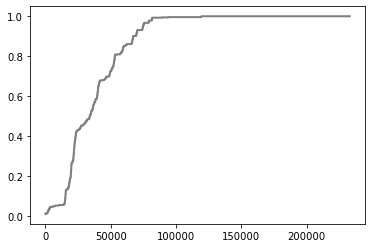

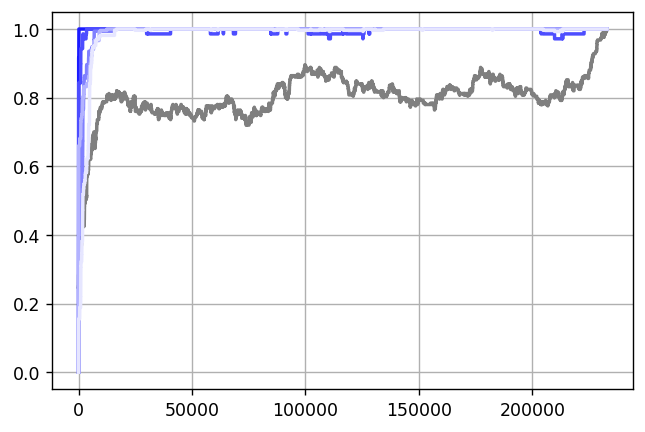

In [9]:
# covered = []
theta = 0.0
theta2 = 0.75

covered=[]
for i in range(len(v2)):
    d = ((np.argmax(v0[i,:,:,-1,:],axis=-1)==np.argmax(v0_final,axis=-1))*1 * (x[0:20,0:20]==0)*1)*1
    conv = np.sum(d)/np.sum(x==0)
    covered.append(conv)

# covered = []
# for i in range(len(v2)):
#     d = np.argmax(v1[i,:,:,-1,:],axis=-1)==np.argmax(v1_final,axis=-1)
#     conv = np.mean(d)
#     covered.append(conv)
# plt.plot(covered,color='k',linewidth=2,linestyle='--')

covered1=[]
for i in range(len(v2)): 
    threshold = v1_final/10; threshold[threshold<0.1]=1
    d = (np.abs(v1[i,:,:,-1,:]-v1_final)<threshold)*1
    conv = np.mean(d[v1_final>theta])
    covered1.append(conv)
    covered1[0]=0

covered2=[]
for i in range(len(v2)):   
    threshold = v2_final/10; threshold[threshold<0.1]=1
    d = (np.abs(v2[i,:,:,-1,:]-v2_final)<threshold)*1
    conv = np.mean(d[v2_final>theta])
    covered2.append(conv)
    covered2[0]=0

covered3 = []
for i in range(len(v3)): 
    threshold = v3_final/10; threshold[threshold<0.1]=1
    d = (np.abs(v3[i,:,:,-1,:]-v3_final)<threshold)*1
    conv = np.mean(d[v3_final>theta])
    covered3.append(conv)
    covered3[0]=0

covered4 = []
for i in range(len(v4)):    
    threshold = v4_final/10; threshold[threshold<0.1]=1
    d = (np.abs(v4[i,:,:,-1,:]-v4_final)<threshold)*1
    conv = np.mean(d[v4_final>theta])
    covered4.append(conv)
    covered4[0]=0

covered5 = []
for i in range(len(v5)): 
    threshold = v5_final/10; threshold[threshold<0.1]=1
    d = (np.abs(v5[i,:,:,-1,:]-v5_final)<threshold)*1
    conv = np.mean(d[v5_final>theta])
    covered5.append(conv)
    covered5[0]=0


# theta2=1.5
covered6 = []
for i in range(len(v0)):
    threshold = v0_final/5; threshold[threshold<0.1]=1
    d = (np.abs(v0[i,:,:,-1,:]-v0_final)<threshold)*1
    conv = np.mean(d[v0_final>theta])
    covered6.append(conv)
plt.plot(covered6,color='tab:gray',linewidth=2)


# plt.xlim([-100,1e3])
plt.figure(dpi=125)
plt.plot(covered,color='tab:grey',linewidth=2)
plt.plot(covered1,linewidth=2,color=[0.1,0.1,1])
plt.plot(covered2,linewidth=2,color=[0.3,0.3,1])
plt.plot(covered3,linewidth=2,color=[0.5,0.5,1])
plt.plot(covered4,linewidth=2,color=[0.7,0.7,1])
plt.plot(covered5,linewidth=2,color=[0.9,0.9,1])

plt.grid(b=True)
plt.savefig('demo.png', transparent=True)

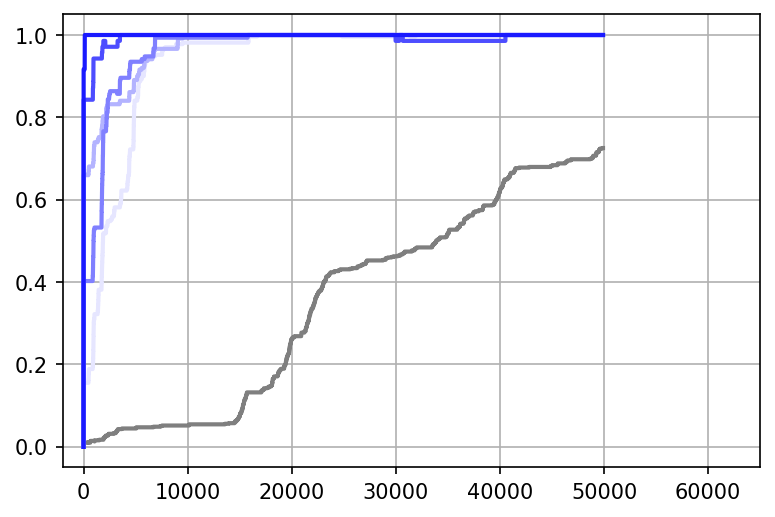

In [26]:
maxplot=49900
plt.figure(dpi=150)
plt.xlim([-2000,65000])
plt.plot(covered6[0:maxplot],color='tab:grey',linewidth=2)
plt.plot(covered5[0:maxplot],linewidth=2,color=[0.9,0.9,1])
plt.plot(covered4[0:maxplot],linewidth=2,color=[0.7,0.7,1])
plt.plot(covered3[0:maxplot],linewidth=2,color=[0.5,0.5,1])
plt.plot(covered2[0:maxplot],linewidth=2,color=[0.3,0.3,1])
plt.plot(covered1[0:maxplot],linewidth=2,color=[0.1,0.1,1])
plt.grid(b=True)
plt.savefig('demo.png', transparent=True)

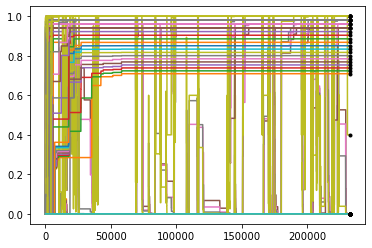

In [46]:
plt.figure()
for i in range(20):
    for j in range(4):
        plt.plot(v2[:,:,i,-1,j])
        plt.plot(0*v2_final[:,i,j]+len(v2),v2_final[:,i,j],'k.')

# Bandits

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import BernoulliArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_learner import UCB, EpsGreedy, ThompsonSampling

In [112]:
horizon = 30
means = np.array([0.3, 0.6])
arms = [BernoulliArm(mean) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), name='Thompson Sampling')]
# intermediate regrets to record for each trial of a game
intermediate_regrets = list(range(0, horizon+1, 1))
temp_file = tempfile.NamedTemporaryFile()

In [113]:

# simulator
game = SinglePlayerProtocol(bandit, learners, intermediate_regrets=intermediate_regrets, horizon=horizon)
# start playing the game
# add `debug=True` for debugging purpose
game.play(trials=2000, output_filename=temp_file.name)

INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 1.27 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 1.58 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 1.09 seconds.


In [114]:
trials_df = trials_to_dataframe(temp_file.name)
del trials_df['other']

In [115]:
trials_df.head()

,rounds,total_actions,regret,bandit,learner
0,0,0,0.0,multi_armed_bandit,Epsilon Greedy
1,1,1,0.6,multi_armed_bandit,Epsilon Greedy
2,2,2,1.2,multi_armed_bandit,Epsilon Greedy
3,3,3,1.8,multi_armed_bandit,Epsilon Greedy
4,4,4,1.4,multi_armed_bandit,Epsilon Greedy


<AxesSubplot:xlabel='total_actions', ylabel='regret'>

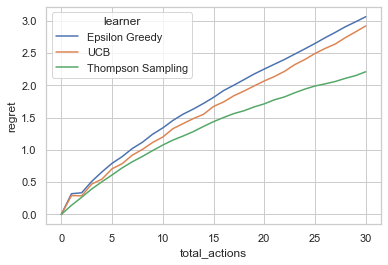

In [116]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df,ci=None)

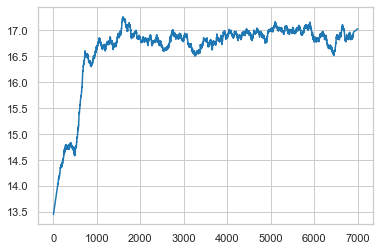

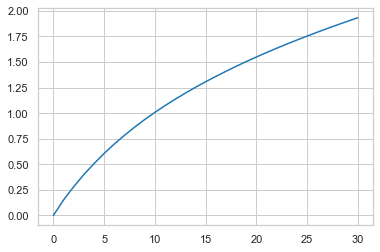

KeyboardInterrupt: 

In [118]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
import torch.optim as optim
import numpy as np
from scipy.signal import savgol_filter

lr=5e-4
epochs=1000000
batch_size=100
device = 'cpu'

class policy_net(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(policy_net, self).__init__()


        self.fc = nn.Sequential(

            nn.Linear(input_shape, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, n_actions)
        )

    def forward(self, x):
        return self.fc(x)


# make function to compute action distribution
def get_policy(obs):
    logits = logits_net(obs)
#         logits = obs
    return Categorical(logits=logits)

# make action selection function (outputs int actions, sampled from policy)
def get_action(obs):
    return get_policy(obs).sample().item()

# make loss function whose gradient, for the right data, is policy gradient
def compute_loss(obs, act, weights):
    logp = get_policy(obs).log_prob(act)
    return -(logp * weights).mean()

def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs

# 

# make core of policy network
logits_net = policy_net(4,2).to(device)

# make optimizer
optimizer = optim.Adam(logits_net.parameters(), lr=lr)

# for training policy
def train_one_epoch():
    global sA,fA,sB,fB,payoffA,payoffB
    # make some empty lists for logging.
    batch_obs = []          # for observations
    batch_acts = []         # for actions
    batch_weights = []      # for R(tau) weighting in policy gradient
    batch_rets = []         # for measuring episode returns
    batch_lens = []         # for measuring episode lengths
    regret=[]

    # reset episode-specific variables
    done = False            # signal from environment that episode is over
    ep_rews,mistakes = [],[]            # list for rewards accrued throughout ep
    wrong=0
    while True:

#         pA = (sA + 1)/(sA+fA+2)
#         pB = (sB + 1)/(sB+fB+2)
#         nA = sA + fA
#         nB = sB + fB

#         obs = [pA,pB,nA,nB]
        obs = [sA,sB,fA,fB]


        # save obs
        batch_obs.append(obs)

        act = get_action(torch.as_tensor(obs, dtype=torch.float32).to(device))

        if act==0:
            rew = (np.random.uniform(0,1)<payoffA)*1
            if rew==0:
                fA = fA + 1
            elif rew==1:
                sA = sA + 1
        elif act==1:
            rew = (np.random.uniform(0,1)<payoffB)*1
            if rew==0:
                fB = fB + 1
            elif rew==1:
                sB = sB + 1
                
        mistakes.append(wrong)       
        if payoffA>payoffB and act==1: 
            wrong=wrong+1
        elif payoffB>payoffA and act==0:
            wrong=wrong+1
            
        if sA+sB+fA+fB>30:
            done = True
        

        # save action, reward
        batch_acts.append(act)
        ep_rews.append(rew)


            
        if done:

            regret.append(mistakes)
            # if episode is over, record info about episode
            ep_ret, ep_len = sum(ep_rews), len(ep_rews)
            batch_rets.append(ep_ret)
            batch_lens.append(ep_len)

            # the weight for each logprob(a|s) is R(tau)
            batch_weights += list(reward_to_go(ep_rews))

            # reset episode-specific variables
#             start_idx = [L[np.random.randint(0, len(L))]]
            done, ep_rews, mistakes, wrong =  False, [] , [] , 0
            
            sA = 0
            sB = 0
            fA = 0
            fB = 0
#             payoffA = np.random.uniform(0,1)
#             payoffB = np.random.uniform(0,1)
            if np.random.uniform(0,1)>0.5:
                payoffA = 0.6
                payoffB = 0.3
            else:
                payoffA = 0.3
                payoffB = 0.6
            # end experience loop if we have enough of it
            if len(batch_obs) > batch_size:
                break

    # take a single policy gradient update step
    optimizer.zero_grad()
    batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32).to('cpu'),
                              act=torch.as_tensor(batch_acts, dtype=torch.int32).to('cpu'),
                              weights=torch.as_tensor(batch_weights, dtype=torch.float32).to('cpu')
                              )
    batch_loss.backward()
    optimizer.step()
    return batch_loss, batch_rets, batch_lens, np.mean(regret,0)

total_reward = []
# training loop
regrets=[]
for i in range(epochs):

#     payoffA = np.random.uniform(0,1)
#     payoffB = np.random.uniform(0,1)
    if np.random.uniform(0,1)>0.5:
        payoffA = 0.6
        payoffB = 0.3
    else:
        payoffA = 0.3
        payoffB = 0.6
    sA = 0
    sB = 0
    fA = 0
    fB = 0

    batch_loss, batch_rets, batch_lens, regret = train_one_epoch()
#         print(start_idx)
#     print('epoch: %3d \t loss: %.3f \t return: %.3f \t ep_len: %.3f'%
#             (i, batch_loss, np.mean(batch_rets), np.mean(batch_lens)))

    total_reward.append(np.mean(batch_rets))
    regrets.append(regret)
#     plt.plot(total_reward);  plt.show()
    if i%100==0:
        clear_output(wait=True)
        if len(total_reward)>202:
            plt.figure()
            plt.plot(savgol_filter(np.array(total_reward),201,1).T,color='tab:blue'); plt.show()            
#     if i%100==0:
#         clear_output(wait=True)
        plt.figure()
        plt.plot(np.mean(regrets,0)*np.abs(payoffA-payoffB),color='tab:blue'); plt.show()

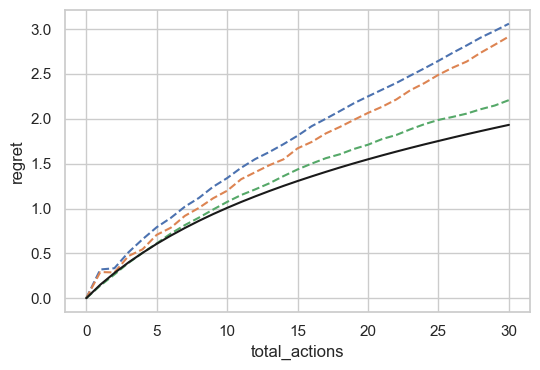

In [130]:
sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df,ci=None,linestyle='--',legend=None)
plt.plot(np.mean(regrets,0)*0.3,color='k');
plt.savefig('demo.png', transparent=True)

In [75]:
action = []

sA=0
fA=1
sB=3
fB=0

obs = [sA,sB,fA,fB]

for i in range(3000):
    action.append(get_action(torch.as_tensor(obs, dtype=torch.float32).to(device)))
np.mean(action)

0.9786666666666667

In [ ]:
# import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
sns.set_theme(style="whitegrid")

ext1 = 10*np.array(np.loadtxt('explo_short_2.txt'))
ext2 = 10*np.array(np.loadtxt('explo_short.txt'))


max_plot=9999
min_plot=0


extended=[savgol_filter(np.array(ext1),15,1).T[min_plot:max_plot],
          savgol_filter(np.array(ext2),15,1).T[min_plot:max_plot]
            ]
x=[np.linspace(0,max_plot,len(extended[i])) for i in range(0,len(extended))]



df1= pd.DataFrame({"y" : np.concatenate(np.array(extended)),
                  "x" : np.concatenate(np.array(x)),
                 })


plt.figure(dpi=150)
sns.lineplot(x="x", y="y", data=df1,color='tab:blue',linewidth=2,ci=99)

plt.plot(-6.9+0*r,color='tab:orange',linewidth=2,linestyle = '--')
plt.plot(-10.6+0*r,color='tab:grey',linewidth=2,linestyle = '--')
plt.plot(-11.5+0*r,color='tab:brown',linewidth=2,linestyle = '--')

plt.grid(b=True)

plt.savefig('demo1.png', transparent=True)